In [154]:
# plotting utilities
import seaborn as sns
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.callbacks import History, ModelCheckpoint

# data-science & processing tools
import numpy as np
import pandas as pd
import sklearn.metrics
import h5py
import functools
import itertools as it
from tqdm.notebook import tqdm
import pygmnormalize as gmn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

### Getting the Data

In [2]:
df = pd.read_csv('raw_data.tsv', sep='\t', header=0)

In [3]:
gene_ID = df['Gene ID']
gene_names = df['Gene Name']

df.drop('Gene ID', axis=1, inplace=True)
df.drop('Gene Name', axis=1, inplace=True)

In [4]:
normal_df = gmn.total_count_normalization(df)

In [5]:
X = normal_df.values

In [6]:
X.shape

(65217, 322)

In [7]:
## indices where values are greater than zero
idx2 = np.where(X.any(axis=1))[0]
newX = X[idx2]
newX.shape

(54914, 322)

In [8]:
## get rows where a value is greater than 0.0001
rows = np.unique(np.where(newX > 0.0001)[0])
newerX = newX[rows]
newerX.shape

(5637, 322)

In [9]:
names = gene_names[idx2].values[rows]

In [10]:
by_patient = newerX.T
by_patient.shape

(322, 5637)

In [11]:
classes = open('classifications.txt', 'r').read()
classes = eval(classes)
y = np.array(list(classes.values()))

In [12]:
label_enc = LabelEncoder()
labels = label_enc.fit_transform(y)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [13]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
labels = labels.reshape(len(labels), 1)
one_hot = enc.fit_transform(labels)
one_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(by_patient, one_hot, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(215, 5637)

### Model

In [95]:
model = K.Sequential()
model.add(K.layers.Dense(units=10, activation='relu', input_shape=(5637,), 
                         kernel_regularizer=K.regularizers.l2(l=0.001)))
model.add(K.layers.Dropout(rate=0.001))
model.add(K.layers.Dense(units=200, activation='relu', kernel_regularizer=K.regularizers.l2(l=0.001)))
model.add(K.layers.Dense(units=3, activation='softmax'))

In [96]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 10)                56380     
_________________________________________________________________
dropout_22 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_69 (Dense)             (None, 3)                 603       
Total params: 59,183
Trainable params: 59,183
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = History()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], callbacks=[history])

In [43]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

Train on 172 samples, validate on 43 samples
Epoch 1/100
172/172 [==============================] - 1s 8ms/sample - loss: 0.3918 - accuracy: 0.8353 - val_loss: 0.3743 - val_accuracy: 0.8450
Epoch 2/100
172/172 [==============================] - 0s 875us/sample - loss: 0.3948 - accuracy: 0.8295 - val_loss: 0.3846 - val_accuracy: 0.8527
Epoch 3/100
172/172 [==============================] - 0s 870us/sample - loss: 0.3861 - accuracy: 0.8391 - val_loss: 0.3755 - val_accuracy: 0.8450
Epoch 4/100
172/172 [==============================] - 0s 886us/sample - loss: 0.3840 - accuracy: 0.8450 - val_loss: 0.3842 - val_accuracy: 0.8527
Epoch 5/100
172/172 [==============================] - 0s 870us/sample - loss: 0.3886 - accuracy: 0.8391 - val_loss: 0.3692 - val_accuracy: 0.8450
Epoch 6/100
172/172 [==============================] - 0s 878us/sample - loss: 0.3860 - accuracy: 0.8314 - val_loss: 0.3812 - val_accuracy: 0.8450
Epoch 7/100
172/172 [==============================] - 0s 939us/sample - lo

172/172 [==============================] - 0s 964us/sample - loss: 0.3900 - accuracy: 0.8333 - val_loss: 0.3911 - val_accuracy: 0.8062
Epoch 57/100
172/172 [==============================] - 0s 980us/sample - loss: 0.3819 - accuracy: 0.8391 - val_loss: 0.4093 - val_accuracy: 0.8450
Epoch 58/100
172/172 [==============================] - 0s 986us/sample - loss: 0.3850 - accuracy: 0.8372 - val_loss: 0.3872 - val_accuracy: 0.8450
Epoch 59/100
172/172 [==============================] - 0s 1ms/sample - loss: 0.3792 - accuracy: 0.8391 - val_loss: 0.4033 - val_accuracy: 0.8450
Epoch 60/100
172/172 [==============================] - 0s 1ms/sample - loss: 0.3830 - accuracy: 0.8314 - val_loss: 0.3819 - val_accuracy: 0.8372
Epoch 61/100
172/172 [==============================] - 0s 994us/sample - loss: 0.3775 - accuracy: 0.8411 - val_loss: 0.3854 - val_accuracy: 0.8450
Epoch 62/100
172/172 [==============================] - 0s 1ms/sample - loss: 0.3856 - accuracy: 0.8353 - val_loss: 0.4130 - val_

In [53]:
print('Best Loss: {}'.format(min(hist.history['val_loss'])))

Best Loss: 0.36916357763977936


In [21]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Model accuracy: {}'.format(accuracy))

Model accuracy: 0.8068535923957825


### Grid Search

In [139]:
def create_model(dropout_rate=0.001, 
                 input_shape=(5637,), 
                 reg_coeff=0.001,
                 reg_type='l2',
                 activation='relu',
                 num_epochs=300,
                 units=200,
                 num_layers=2):
    model = K.Sequential()
    if reg_type == 'l2':
        reg = K.regularizers.l2(l=reg_coeff)
    elif reg_type == 'l1':
        reg = K.regularizers.l1(l=reg_coeff)
    model.add(K.layers.Dense(units=units, activation=activation, input_shape=input_shape, 
                             kernel_regularizer=reg))
    model.add(K.layers.Dropout(rate=dropout_rate))
#     model.add(K.layers.Dense(units=units, activation=activation, kernel_regularizer=reg))

    for i in range(num_layers-1):
        model.add(K.layers.Dense(units=units, activation=activation, kernel_regularizer=reg))
        model.add(K.layers.Dropout(rate=dropout_rate))
    
    model.add(K.layers.Dense(units=3, activation='softmax'))
    history = History()
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], callbacks=[history])
    
    hist = model.fit(X_train, y_train, epochs=num_epochs, batch_size=10, validation_split=0.2)
    
    best_loss = min(hist.history['val_loss'])
    
    return best_loss

In [144]:
def grid_search(dropout_rates, 
                reg_coeffs,
                reg_types,
                pbars,
                num_epochs,
                activations=['relu'],
                units=[200],
                num_layers=[2]):
    """performs a grid hyperparameter search with loss as the metric
    
    perform a grid search over different hyper parameter configurations
    to determing the optimal configuration for the cnn
    
    Arguments:
      dropout_rates: a list of dropout_rates to test
      reg_coeffs: a list or L2 lambda terms to test
      learning_rates: a list of learning rates to test
      pbars: a list of `tqdm` progress bar objects to use for displaying
        grid search and training progress
        * len(pbars) == 3
      verbose: (False)flag to print grid search parameters and epoch loss on 
        each respective iteration
      **kwargs: any additional valid keyword arguments for passing to
        `cnn_train` 
        
    Returns:
      losses_df: a `pd.DataFrame` table of the grid search results
        * len(losses_df) == (len(dropout_rates) * len(reg_coeffs) 
                             * len(learning_rates))
    """
    losses = []
    hyperparam_combos = list(
        it.product(dropout_rates, reg_coeffs, reg_types, activations, units, num_layers))
    
    pbars[0].reset(len(hyperparam_combos))
    pbars[0].set_description('Grid Search')
    for dropout_rate, reg_coeff, reg_type, activation, units, num_layers in hyperparam_combos:
        tf.print('Beginning training for dr={:.3f}, l_lambda={:.1e}, reg_type={}, act: {}'.format(dropout_rate, 
                                                                                             reg_coeff, reg_type,
                                                                                             activation))
        
        best_loss = create_model(dropout_rate=dropout_rate, 
                                 input_shape=(5637,), 
                                 reg_coeff=reg_coeff, 
                                 reg_type=reg_type,
                                 activation=activation,
                                 num_epochs=num_epochs,
                                 units=units,
                                 num_layers=num_layers)
        losses.append([dropout_rate, 
                       reg_type,
                       reg_coeff,
                       activation,
                       units,
                       num_layers,
                       best_loss])
        
        pbars[0].update()
    
#     return losses
        
    losses_df = pd.DataFrame(losses, 
                             columns=['dropout rate',
                                      'reg type',
                                      'lambda',
                                      'activation',
                                      'units',
                                      'num_layers',
                                      'validation loss'])                                              
    return losses_df

In [104]:
dropout_rates = [0.001, 0.01, 0.1]
reg_types = ['l2', 'l1']
reg_coeffs = [0.001, 0.01, 0.1]

pbar = functools.partial(tqdm, leave=True, ncols='70%')
pbars = [pbar() for _ in range(3)]

grid_search_df = grid_search(dropout_rates=dropout_rates, reg_coeffs=reg_coeffs,
                             reg_types=reg_types, pbars=pbars, num_epochs=200)

Beginning training for dr=0.001, l_lambda=1.0e-03, reg_type=l2
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 1s 8ms/sample - loss: 0.6485 - accuracy: 0.6667 - val_loss: 0.6182 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 838us/sample - loss: 0.5972 - accuracy: 0.6667 - val_loss: 0.5646 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 833us/sample - loss: 0.5447 - accuracy: 0.7500 - val_loss: 0.5221 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 846us/sample - loss: 0.5187 - accuracy: 0.7791 - val_loss: 0.5112 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 858us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5081 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5135 - accuracy: 0.7791 - val_loss: 0.5070 - val_accuracy: 0.7829
Epoch 7/200


Epoch 56/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5037 - accuracy: 0.7791 - val_loss: 0.4943 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5018 - accuracy: 0.7791 - val_loss: 0.4947 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 936us/sample - loss: 0.5025 - accuracy: 0.7791 - val_loss: 0.4938 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5026 - accuracy: 0.7791 - val_loss: 0.4928 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5011 - accuracy: 0.7791 - val_loss: 0.4921 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5011 - accuracy: 0.7791 - val_loss: 0.4923 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 892us/sample - loss: 0.5010 - accuracy: 0.7791 - val_loss: 0.

172/172 [==============================] - 0s 855us/sample - loss: 0.4585 - accuracy: 0.8101 - val_loss: 0.4517 - val_accuracy: 0.7907
Epoch 112/200
172/172 [==============================] - 0s 865us/sample - loss: 0.4617 - accuracy: 0.8081 - val_loss: 0.4525 - val_accuracy: 0.7984
Epoch 113/200
172/172 [==============================] - 0s 855us/sample - loss: 0.4596 - accuracy: 0.8081 - val_loss: 0.4559 - val_accuracy: 0.8062
Epoch 114/200
172/172 [==============================] - 0s 853us/sample - loss: 0.4567 - accuracy: 0.8140 - val_loss: 0.4549 - val_accuracy: 0.8062
Epoch 115/200
172/172 [==============================] - 0s 874us/sample - loss: 0.4572 - accuracy: 0.8043 - val_loss: 0.4567 - val_accuracy: 0.8062
Epoch 116/200
172/172 [==============================] - 0s 863us/sample - loss: 0.4572 - accuracy: 0.8120 - val_loss: 0.4555 - val_accuracy: 0.8062
Epoch 117/200
172/172 [==============================] - 0s 862us/sample - loss: 0.4596 - accuracy: 0.8120 - val_loss: 0

172/172 [==============================] - 0s 985us/sample - loss: 0.4357 - accuracy: 0.8256 - val_loss: 0.4371 - val_accuracy: 0.8295
Epoch 167/200
172/172 [==============================] - 0s 963us/sample - loss: 0.4340 - accuracy: 0.8256 - val_loss: 0.4341 - val_accuracy: 0.8140
Epoch 168/200
172/172 [==============================] - 0s 930us/sample - loss: 0.4360 - accuracy: 0.8178 - val_loss: 0.4325 - val_accuracy: 0.8062
Epoch 169/200
172/172 [==============================] - 0s 964us/sample - loss: 0.4355 - accuracy: 0.8217 - val_loss: 0.4320 - val_accuracy: 0.8062
Epoch 170/200
172/172 [==============================] - 0s 906us/sample - loss: 0.4355 - accuracy: 0.8198 - val_loss: 0.4304 - val_accuracy: 0.8062
Epoch 171/200
172/172 [==============================] - 0s 939us/sample - loss: 0.4385 - accuracy: 0.8081 - val_loss: 0.4346 - val_accuracy: 0.8372
Epoch 172/200
172/172 [==============================] - 0s 975us/sample - loss: 0.4328 - accuracy: 0.8236 - val_loss: 0

172/172 [==============================] - 0s 933us/sample - loss: 0.5174 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 999us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 967us/sample - loss: 0.5175 - accuracy: 0.7791 - val_loss: 0.5105 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5177 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 995us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 26/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5093 - val_

172/172 [==============================] - 0s 906us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 76/200
172/172 [==============================] - 0s 880us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 77/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5176 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 78/200
172/172 [==============================] - 0s 887us/sample - loss: 0.5187 - accuracy: 0.7791 - val_loss: 0.5098 - val_accuracy: 0.7829
Epoch 79/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5177 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 80/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 81/200
172/172 [==============================] - 0s 855us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5089 

172/172 [==============================] - 0s 871us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5083 - val_accuracy: 0.7829
Epoch 131/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5156 - accuracy: 0.7791 - val_loss: 0.5083 - val_accuracy: 0.7829
Epoch 132/200
172/172 [==============================] - 0s 855us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5083 - val_accuracy: 0.7829
Epoch 133/200
172/172 [==============================] - 0s 859us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 134/200
172/172 [==============================] - 0s 857us/sample - loss: 0.5155 - accuracy: 0.7791 - val_loss: 0.5084 - val_accuracy: 0.7829
Epoch 135/200
172/172 [==============================] - 0s 865us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 136/200
172/172 [==============================] - 0s 868us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 871us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 186/200
172/172 [==============================] - 0s 869us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 187/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5085 - val_accuracy: 0.7829
Epoch 188/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5156 - accuracy: 0.7791 - val_loss: 0.5085 - val_accuracy: 0.7829
Epoch 189/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 190/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 191/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0

Epoch 40/200
172/172 [==============================] - 0s 876us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 41/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 42/200
172/172 [==============================] - 0s 919us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 43/200
172/172 [==============================] - 0s 885us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 44/200
172/172 [==============================] - 0s 884us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 45/200
172/172 [==============================] - 0s 892us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 46/200
172/172 [==============================] - 0s 879us/sample - loss: 0.5100 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 927us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 96/200
172/172 [==============================] - 0s 917us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 97/200
172/172 [==============================] - 0s 944us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 98/200
172/172 [==============================] - 0s 917us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 99/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 100/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 101/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.502

172/172 [==============================] - 0s 904us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 151/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 152/200
172/172 [==============================] - 0s 890us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 153/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 154/200
172/172 [==============================] - 0s 898us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 155/200
172/172 [==============================] - 0s 898us/sample - loss: 0.5083 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 156/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 904us/sample - loss: 1.3282 - accuracy: 0.7791 - val_loss: 1.1598 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 865us/sample - loss: 1.0644 - accuracy: 0.7791 - val_loss: 0.9478 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 863us/sample - loss: 0.8783 - accuracy: 0.7791 - val_loss: 0.7928 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 0s 896us/sample - loss: 0.7462 - accuracy: 0.7791 - val_loss: 0.6862 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 0s 874us/sample - loss: 0.6567 - accuracy: 0.7791 - val_loss: 0.6152 - val_accuracy: 0.7829
Epoch 9/200
172/172 [==============================] - 0s 886us/sample - loss: 0.6041 - accuracy: 0.7791 - val_loss: 0.5836 - val_accuracy: 0.7829
Epoch 10/200
172/172 [==============================] - 0s 886us/sample - loss: 0.5869 - accuracy: 0.7791 - val_loss: 0.5781 - val

172/172 [==============================] - 0s 943us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 905us/sample - loss: 0.5842 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 952us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5749 - val_accuracy: 0.7829
Epoch 63/200
172/172 [==============================] - 0s 937us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5775 - val_accuracy: 0.7829
Epoch 64/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5835 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 65/200
172/172 [==============================] - 0s 916us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5767 

172/172 [==============================] - 0s 974us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 979us/sample - loss: 0.5836 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 116/200
172/172 [==============================] - 0s 970us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5754 - val_accuracy: 0.7829
Epoch 117/200
172/172 [==============================] - 0s 964us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 118/200
172/172 [==============================] - 0s 981us/sample - loss: 0.5839 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 119/200
172/172 [==============================] - 0s 963us/sample - loss: 0.5837 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 120/200
172/172 [==============================] - 0s 962us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 899us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 170/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5820 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 171/200
172/172 [==============================] - 0s 883us/sample - loss: 0.5852 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 172/200
172/172 [==============================] - 0s 885us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 173/200
172/172 [==============================] - 0s 883us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 174/200
172/172 [==============================] - 0s 943us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 175/200
172/172 [==============================] - 0s 883us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 980us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 939us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 26/200
172/172 [==============================] - 0s 906us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 27/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 28/200
172/172 [==============================] - 0s 956us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 29/200
172/172 [==============================] - 0s 926us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5020 

172/172 [==============================] - 0s 968us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 79/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 80/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 81/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 82/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 83/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5105 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 84/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 

172/172 [==============================] - 0s 969us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 134/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 135/200
172/172 [==============================] - 0s 961us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 136/200
172/172 [==============================] - 0s 953us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 137/200
172/172 [==============================] - 0s 975us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 138/200
172/172 [==============================] - 0s 961us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 139/200
172/172 [==============================] - 0s 958us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5

172/172 [==============================] - 0s 911us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 189/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 190/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 191/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 192/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 193/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 194/200
172/172 [==============================] - 0s 943us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0

Epoch 43/200
172/172 [==============================] - 0s 988us/sample - loss: 1.2446 - accuracy: 0.7791 - val_loss: 1.2465 - val_accuracy: 0.7829
Epoch 44/200
172/172 [==============================] - 0s 965us/sample - loss: 1.2448 - accuracy: 0.7791 - val_loss: 1.2515 - val_accuracy: 0.7829
Epoch 45/200
172/172 [==============================] - 0s 941us/sample - loss: 1.2448 - accuracy: 0.7791 - val_loss: 1.2394 - val_accuracy: 0.7829
Epoch 46/200
172/172 [==============================] - 0s 948us/sample - loss: 1.2428 - accuracy: 0.7791 - val_loss: 1.2461 - val_accuracy: 0.7829
Epoch 47/200
172/172 [==============================] - 0s 949us/sample - loss: 1.2460 - accuracy: 0.7791 - val_loss: 1.2440 - val_accuracy: 0.7829
Epoch 48/200
172/172 [==============================] - 0s 949us/sample - loss: 1.2447 - accuracy: 0.7791 - val_loss: 1.2321 - val_accuracy: 0.7829
Epoch 49/200
172/172 [==============================] - 0s 952us/sample - loss: 1.2444 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 1ms/sample - loss: 1.2466 - accuracy: 0.7791 - val_loss: 1.2458 - val_accuracy: 0.7829
Epoch 99/200
172/172 [==============================] - 0s 987us/sample - loss: 1.2484 - accuracy: 0.7791 - val_loss: 1.2443 - val_accuracy: 0.7829
Epoch 100/200
172/172 [==============================] - 0s 945us/sample - loss: 1.2431 - accuracy: 0.7791 - val_loss: 1.2484 - val_accuracy: 0.7829
Epoch 101/200
172/172 [==============================] - 0s 968us/sample - loss: 1.2490 - accuracy: 0.7791 - val_loss: 1.2381 - val_accuracy: 0.7829
Epoch 102/200
172/172 [==============================] - 0s 934us/sample - loss: 1.2423 - accuracy: 0.7791 - val_loss: 1.2448 - val_accuracy: 0.7829
Epoch 103/200
172/172 [==============================] - 0s 920us/sample - loss: 1.2451 - accuracy: 0.7791 - val_loss: 1.2466 - val_accuracy: 0.7829
Epoch 104/200
172/172 [==============================] - 0s 931us/sample - loss: 1.2452 - accuracy: 0.7791 - val_loss: 1.23

172/172 [==============================] - 0s 922us/sample - loss: 1.2396 - accuracy: 0.7791 - val_loss: 1.2414 - val_accuracy: 0.7829
Epoch 154/200
172/172 [==============================] - 0s 975us/sample - loss: 1.2458 - accuracy: 0.7791 - val_loss: 1.2519 - val_accuracy: 0.7829
Epoch 155/200
172/172 [==============================] - 0s 917us/sample - loss: 1.2466 - accuracy: 0.7791 - val_loss: 1.2473 - val_accuracy: 0.7829
Epoch 156/200
172/172 [==============================] - 0s 901us/sample - loss: 1.2445 - accuracy: 0.7791 - val_loss: 1.2480 - val_accuracy: 0.7829
Epoch 157/200
172/172 [==============================] - 0s 929us/sample - loss: 1.2461 - accuracy: 0.7791 - val_loss: 1.2378 - val_accuracy: 0.7829
Epoch 158/200
172/172 [==============================] - 0s 913us/sample - loss: 1.2422 - accuracy: 0.7791 - val_loss: 1.2451 - val_accuracy: 0.7829
Epoch 159/200
172/172 [==============================] - 0s 908us/sample - loss: 1.2468 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 931us/sample - loss: 0.5132 - accuracy: 0.7791 - val_loss: 0.5058 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5123 - accuracy: 0.7791 - val_loss: 0.5048 - val_accuracy: 0.7829
Epoch 9/200
172/172 [==============================] - 0s 944us/sample - loss: 0.5118 - accuracy: 0.7791 - val_loss: 0.5040 - val_accuracy: 0.7829
Epoch 10/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5106 - accuracy: 0.7791 - val_loss: 0.5038 - val_accuracy: 0.7829
Epoch 11/200
172/172 [==============================] - 0s 920us/sample - loss: 0.5117 - accuracy: 0.7791 - val_loss: 0.5036 - val_accuracy: 0.7829
Epoch 12/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5108 - accuracy: 0.7791 - val_loss: 0.5032 - val_accuracy: 0.7829
Epoch 13/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5116 - accuracy: 0.7791 - val_loss: 0.5029 - va

172/172 [==============================] - 0s 921us/sample - loss: 0.5028 - accuracy: 0.7791 - val_loss: 0.4925 - val_accuracy: 0.7829
Epoch 63/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5043 - accuracy: 0.7791 - val_loss: 0.4919 - val_accuracy: 0.7829
Epoch 64/200
172/172 [==============================] - 0s 936us/sample - loss: 0.5022 - accuracy: 0.7791 - val_loss: 0.4913 - val_accuracy: 0.7829
Epoch 65/200
172/172 [==============================] - 0s 981us/sample - loss: 0.5030 - accuracy: 0.7791 - val_loss: 0.4907 - val_accuracy: 0.7829
Epoch 66/200
172/172 [==============================] - 0s 940us/sample - loss: 0.5006 - accuracy: 0.7791 - val_loss: 0.4904 - val_accuracy: 0.7829
Epoch 67/200
172/172 [==============================] - 0s 928us/sample - loss: 0.4998 - accuracy: 0.7791 - val_loss: 0.4894 - val_accuracy: 0.7829
Epoch 68/200
172/172 [==============================] - 0s 966us/sample - loss: 0.4981 - accuracy: 0.7791 - val_loss: 0.4897 

172/172 [==============================] - 0s 969us/sample - loss: 0.4553 - accuracy: 0.8140 - val_loss: 0.4482 - val_accuracy: 0.7984
Epoch 118/200
172/172 [==============================] - 0s 961us/sample - loss: 0.4541 - accuracy: 0.8120 - val_loss: 0.4534 - val_accuracy: 0.8062
Epoch 119/200
172/172 [==============================] - 0s 956us/sample - loss: 0.4564 - accuracy: 0.8159 - val_loss: 0.4485 - val_accuracy: 0.8062
Epoch 120/200
172/172 [==============================] - 0s 938us/sample - loss: 0.4517 - accuracy: 0.8159 - val_loss: 0.4498 - val_accuracy: 0.8062
Epoch 121/200
172/172 [==============================] - 0s 928us/sample - loss: 0.4525 - accuracy: 0.8140 - val_loss: 0.4471 - val_accuracy: 0.8062
Epoch 122/200
172/172 [==============================] - 0s 939us/sample - loss: 0.4540 - accuracy: 0.8198 - val_loss: 0.4490 - val_accuracy: 0.8062
Epoch 123/200
172/172 [==============================] - 0s 966us/sample - loss: 0.4512 - accuracy: 0.8140 - val_loss: 0

172/172 [==============================] - 0s 904us/sample - loss: 0.4340 - accuracy: 0.8236 - val_loss: 0.4306 - val_accuracy: 0.8140
Epoch 173/200
172/172 [==============================] - 0s 913us/sample - loss: 0.4368 - accuracy: 0.8198 - val_loss: 0.4425 - val_accuracy: 0.8295
Epoch 174/200
172/172 [==============================] - 0s 902us/sample - loss: 0.4318 - accuracy: 0.8275 - val_loss: 0.4312 - val_accuracy: 0.8217
Epoch 175/200
172/172 [==============================] - 0s 905us/sample - loss: 0.4333 - accuracy: 0.8198 - val_loss: 0.4329 - val_accuracy: 0.8295
Epoch 176/200
172/172 [==============================] - 0s 940us/sample - loss: 0.4312 - accuracy: 0.8256 - val_loss: 0.4317 - val_accuracy: 0.8295
Epoch 177/200
172/172 [==============================] - 0s 923us/sample - loss: 0.4341 - accuracy: 0.8178 - val_loss: 0.4313 - val_accuracy: 0.8295
Epoch 178/200
172/172 [==============================] - 0s 906us/sample - loss: 0.4295 - accuracy: 0.8256 - val_loss: 0

172/172 [==============================] - 0s 948us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 27/200
172/172 [==============================] - 0s 920us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 28/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5174 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 29/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 30/200
172/172 [==============================] - 0s 949us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 31/200
172/172 [==============================] - 0s 927us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5091 

172/172 [==============================] - 0s 956us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 82/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5168 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 83/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 84/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 85/200
172/172 [==============================] - 0s 989us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 86/200
172/172 [==============================] - 0s 941us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5091 

172/172 [==============================] - 0s 934us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 137/200
172/172 [==============================] - 0s 927us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 138/200
172/172 [==============================] - 0s 945us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 139/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 140/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 141/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 142/200
172/172 [==============================] - 0s 900us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 932us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 192/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 193/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5177 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 194/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 195/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 196/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 197/200
172/172 [==============================] - 0s 937us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0

Epoch 46/200
172/172 [==============================] - 0s 990us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 47/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 48/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 49/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 50/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5014 - val_accuracy: 0.7829
Epoch 51/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5014 - val_accuracy: 0.7829
Epoch 52/200
172/172 [==============================] - 0s 979us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss

172/172 [==============================] - 0s 970us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 102/200
172/172 [==============================] - 0s 969us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 103/200
172/172 [==============================] - 0s 975us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 104/200
172/172 [==============================] - 0s 952us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 105/200
172/172 [==============================] - 0s 952us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 106/200
172/172 [==============================] - 0s 958us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 107/200
172/172 [==============================] - 0s 965us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 911us/sample - loss: 0.5129 - accuracy: 0.7791 - val_loss: 0.5036 - val_accuracy: 0.7829
Epoch 157/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 158/200
172/172 [==============================] - 0s 900us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 159/200
172/172 [==============================] - 0s 949us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 160/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 161/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 162/200
172/172 [==============================] - 0s 916us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 969us/sample - loss: 0.5875 - accuracy: 0.7791 - val_loss: 0.5781 - val_accuracy: 0.7829
Epoch 11/200
172/172 [==============================] - 0s 950us/sample - loss: 0.5845 - accuracy: 0.7791 - val_loss: 0.5767 - val_accuracy: 0.7829
Epoch 12/200
172/172 [==============================] - 0s 930us/sample - loss: 0.5838 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 13/200
172/172 [==============================] - 0s 926us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 14/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 15/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5769 - val_accuracy: 0.7829
Epoch 16/200
172/172 [==============================] - 0s 947us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5760 

172/172 [==============================] - 0s 939us/sample - loss: 0.5816 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 66/200
172/172 [==============================] - 0s 957us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 67/200
172/172 [==============================] - 0s 954us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 68/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 69/200
172/172 [==============================] - 0s 944us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 70/200
172/172 [==============================] - 0s 980us/sample - loss: 0.5818 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 71/200
172/172 [==============================] - 0s 953us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5760 

172/172 [==============================] - 0s 991us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 121/200
172/172 [==============================] - 0s 954us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5774 - val_accuracy: 0.7829
Epoch 122/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 123/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 124/200
172/172 [==============================] - 0s 988us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5769 - val_accuracy: 0.7829
Epoch 125/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5817 - accuracy: 0.7791 - val_loss: 0.5764 - val_accuracy: 0.7829
Epoch 126/200
172/172 [==============================] - 0s 943us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5

172/172 [==============================] - 0s 909us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5782 - val_accuracy: 0.7829
Epoch 176/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 177/200
172/172 [==============================] - 0s 924us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 178/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 179/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 180/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 181/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5819 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 889us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 30/200
172/172 [==============================] - 0s 879us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 31/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 33/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 34/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 35/200
172/172 [==============================] - 0s 874us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5020 

172/172 [==============================] - 0s 970us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 85/200
172/172 [==============================] - 0s 949us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 86/200
172/172 [==============================] - 0s 947us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 963us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 88/200
172/172 [==============================] - 0s 954us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 89/200
172/172 [==============================] - 0s 948us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 90/200
172/172 [==============================] - 0s 991us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5021 

172/172 [==============================] - 0s 925us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 140/200
172/172 [==============================] - 0s 916us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 141/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 142/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 143/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5101 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 144/200
172/172 [==============================] - 0s 942us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 145/200
172/172 [==============================] - 0s 900us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 947us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5026 - val_accuracy: 0.7829
Epoch 195/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5113 - accuracy: 0.7791 - val_loss: 0.5036 - val_accuracy: 0.7829
Epoch 196/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 197/200
172/172 [==============================] - 0s 901us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 198/200
172/172 [==============================] - 0s 893us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 199/200
172/172 [==============================] - 0s 892us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 200/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0

Epoch 49/200
172/172 [==============================] - 0s 927us/sample - loss: 1.2418 - accuracy: 0.7791 - val_loss: 1.2524 - val_accuracy: 0.7829
Epoch 50/200
172/172 [==============================] - 0s 926us/sample - loss: 1.2429 - accuracy: 0.7791 - val_loss: 1.2421 - val_accuracy: 0.7829
Epoch 51/200
172/172 [==============================] - 0s 911us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1.2465 - val_accuracy: 0.7829
Epoch 52/200
172/172 [==============================] - 0s 915us/sample - loss: 1.2455 - accuracy: 0.7791 - val_loss: 1.2387 - val_accuracy: 0.7829
Epoch 53/200
172/172 [==============================] - 0s 910us/sample - loss: 1.2385 - accuracy: 0.7791 - val_loss: 1.2476 - val_accuracy: 0.7829
Epoch 54/200
172/172 [==============================] - 0s 926us/sample - loss: 1.2476 - accuracy: 0.7791 - val_loss: 1.2369 - val_accuracy: 0.7829
Epoch 55/200
172/172 [==============================] - 0s 945us/sample - loss: 1.2383 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 939us/sample - loss: 1.2438 - accuracy: 0.7791 - val_loss: 1.2357 - val_accuracy: 0.7829
Epoch 105/200
172/172 [==============================] - 0s 972us/sample - loss: 1.2394 - accuracy: 0.7791 - val_loss: 1.2583 - val_accuracy: 0.7829
Epoch 106/200
172/172 [==============================] - 0s 964us/sample - loss: 1.2460 - accuracy: 0.7791 - val_loss: 1.2358 - val_accuracy: 0.7829
Epoch 107/200
172/172 [==============================] - 0s 949us/sample - loss: 1.2401 - accuracy: 0.7791 - val_loss: 1.2520 - val_accuracy: 0.7829
Epoch 108/200
172/172 [==============================] - 0s 946us/sample - loss: 1.2463 - accuracy: 0.7791 - val_loss: 1.2373 - val_accuracy: 0.7829
Epoch 109/200
172/172 [==============================] - 0s 942us/sample - loss: 1.2405 - accuracy: 0.7791 - val_loss: 1.2440 - val_accuracy: 0.7829
Epoch 110/200
172/172 [==============================] - 0s 940us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 952us/sample - loss: 1.2452 - accuracy: 0.7791 - val_loss: 1.2418 - val_accuracy: 0.7829
Epoch 160/200
172/172 [==============================] - 0s 934us/sample - loss: 1.2431 - accuracy: 0.7791 - val_loss: 1.2335 - val_accuracy: 0.7829
Epoch 161/200
172/172 [==============================] - 0s 954us/sample - loss: 1.2418 - accuracy: 0.7791 - val_loss: 1.2527 - val_accuracy: 0.7829
Epoch 162/200
172/172 [==============================] - 0s 926us/sample - loss: 1.2437 - accuracy: 0.7791 - val_loss: 1.2389 - val_accuracy: 0.7829
Epoch 163/200
172/172 [==============================] - 0s 935us/sample - loss: 1.2411 - accuracy: 0.7791 - val_loss: 1.2516 - val_accuracy: 0.7829
Epoch 164/200
172/172 [==============================] - 0s 923us/sample - loss: 1.2476 - accuracy: 0.7791 - val_loss: 1.2385 - val_accuracy: 0.7829
Epoch 165/200
172/172 [==============================] - 0s 914us/sample - loss: 1.2380 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 914us/sample - loss: 0.5118 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 14/200
172/172 [==============================] - 0s 892us/sample - loss: 0.5126 - accuracy: 0.7791 - val_loss: 0.5033 - val_accuracy: 0.7829
Epoch 15/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5116 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 16/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 17/200
172/172 [==============================] - 0s 974us/sample - loss: 0.5110 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 18/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 19/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5022 

172/172 [==============================] - 0s 965us/sample - loss: 0.4980 - accuracy: 0.7791 - val_loss: 0.4910 - val_accuracy: 0.7829
Epoch 69/200
172/172 [==============================] - 0s 985us/sample - loss: 0.4988 - accuracy: 0.7791 - val_loss: 0.4906 - val_accuracy: 0.7829
Epoch 70/200
172/172 [==============================] - 0s 973us/sample - loss: 0.5023 - accuracy: 0.7791 - val_loss: 0.4916 - val_accuracy: 0.7829
Epoch 71/200
172/172 [==============================] - 0s 976us/sample - loss: 0.5008 - accuracy: 0.7791 - val_loss: 0.4881 - val_accuracy: 0.7829
Epoch 72/200
172/172 [==============================] - 0s 982us/sample - loss: 0.5058 - accuracy: 0.7791 - val_loss: 0.4905 - val_accuracy: 0.7829
Epoch 73/200
172/172 [==============================] - 0s 965us/sample - loss: 0.4994 - accuracy: 0.7791 - val_loss: 0.4873 - val_accuracy: 0.7829
Epoch 74/200
172/172 [==============================] - 0s 965us/sample - loss: 0.4983 - accuracy: 0.7791 - val_loss: 0.4895 

172/172 [==============================] - 0s 909us/sample - loss: 0.4601 - accuracy: 0.8062 - val_loss: 0.4532 - val_accuracy: 0.8062
Epoch 124/200
172/172 [==============================] - 0s 887us/sample - loss: 0.4630 - accuracy: 0.8178 - val_loss: 0.4496 - val_accuracy: 0.7907
Epoch 125/200
172/172 [==============================] - 0s 899us/sample - loss: 0.4582 - accuracy: 0.7926 - val_loss: 0.4595 - val_accuracy: 0.8140
Epoch 126/200
172/172 [==============================] - 0s 904us/sample - loss: 0.4616 - accuracy: 0.8198 - val_loss: 0.4524 - val_accuracy: 0.8062
Epoch 127/200
172/172 [==============================] - 0s 902us/sample - loss: 0.4566 - accuracy: 0.8023 - val_loss: 0.4555 - val_accuracy: 0.8062
Epoch 128/200
172/172 [==============================] - 0s 924us/sample - loss: 0.4598 - accuracy: 0.8043 - val_loss: 0.4570 - val_accuracy: 0.8140
Epoch 129/200
172/172 [==============================] - 0s 944us/sample - loss: 0.4568 - accuracy: 0.8159 - val_loss: 0

172/172 [==============================] - 0s 972us/sample - loss: 0.4460 - accuracy: 0.8140 - val_loss: 0.4396 - val_accuracy: 0.8372
Epoch 179/200
172/172 [==============================] - 0s 963us/sample - loss: 0.4404 - accuracy: 0.8275 - val_loss: 0.4315 - val_accuracy: 0.7984
Epoch 180/200
172/172 [==============================] - 0s 923us/sample - loss: 0.4406 - accuracy: 0.8178 - val_loss: 0.4344 - val_accuracy: 0.8140
Epoch 181/200
172/172 [==============================] - 0s 926us/sample - loss: 0.4333 - accuracy: 0.8256 - val_loss: 0.4304 - val_accuracy: 0.7984
Epoch 182/200
172/172 [==============================] - 0s 990us/sample - loss: 0.4417 - accuracy: 0.8140 - val_loss: 0.4353 - val_accuracy: 0.8295
Epoch 183/200
172/172 [==============================] - 0s 929us/sample - loss: 0.4396 - accuracy: 0.8217 - val_loss: 0.4357 - val_accuracy: 0.8372
Epoch 184/200
172/172 [==============================] - 0s 918us/sample - loss: 0.4348 - accuracy: 0.8275 - val_loss: 0

Epoch 33/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 34/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 35/200
172/172 [==============================] - 0s 914us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5099 - val_accuracy: 0.7829
Epoch 36/200
172/172 [==============================] - 0s 891us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 37/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 38/200
172/172 [==============================] - 0s 905us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 39/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5171 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 984us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 89/200
172/172 [==============================] - 0s 995us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 90/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 91/200
172/172 [==============================] - 0s 984us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 92/200
172/172 [==============================] - 0s 982us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 93/200
172/172 [==============================] - 0s 981us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 94/200
172/172 [==============================] - 0s 992us/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.5087 - 

172/172 [==============================] - 0s 929us/sample - loss: 0.5155 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 144/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 145/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 146/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 147/200
172/172 [==============================] - 0s 984us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 148/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5172 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 149/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 937us/sample - loss: 0.5178 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 199/200
172/172 [==============================] - 0s 951us/sample - loss: 0.5153 - accuracy: 0.7791 - val_loss: 0.5084 - val_accuracy: 0.7829
Epoch 200/200
172/172 [==============================] - 0s 973us/sample - loss: 0.5191 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Beginning training for dr=0.100, l_lambda=1.0e-02, reg_type=l2
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 1s 9ms/sample - loss: 0.8849 - accuracy: 0.6667 - val_loss: 0.7647 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 926us/sample - loss: 0.7140 - accuracy: 0.6667 - val_loss: 0.6616 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 906us/sample - loss: 0.6347 - accuracy: 0.6919 - val_loss: 0.6006 - val_accuracy: 0.7829
Epoch 4/200
172/172 

Epoch 53/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 54/200
172/172 [==============================] - 0s 876us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 55/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5090 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 950us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 109/200
172/172 [==============================] - 0s 991us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 110/200
172/172 [==============================] - 0s 964us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 111/200
172/172 [==============================] - 0s 963us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 112/200
172/172 [==============================] - 0s 999us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 113/200
172/172 [==============================] - 0s 997us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 990us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 919us/sample - loss: 0.5085 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 164/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5111 - accuracy: 0.7791 - val_loss: 0.5031 - val_accuracy: 0.7829
Epoch 165/200
172/172 [==============================] - 0s 919us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 166/200
172/172 [==============================] - 0s 900us/sample - loss: 0.5106 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 167/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 168/200
172/172 [==============================] - 0s 921us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 169/200
172/172 [==============================] - 0s 926us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 892us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 18/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 19/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 880us/sample - loss: 0.5842 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 881us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5771 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5766 

172/172 [==============================] - 0s 987us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5766 - val_accuracy: 0.7829
Epoch 73/200
172/172 [==============================] - 0s 963us/sample - loss: 0.5836 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 74/200
172/172 [==============================] - 0s 986us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 75/200
172/172 [==============================] - 0s 959us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 76/200
172/172 [==============================] - 0s 979us/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5746 - val_accuracy: 0.7829
Epoch 77/200
172/172 [==============================] - 0s 978us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5772 - val_accuracy: 0.7829
Epoch 78/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5764 - 

172/172 [==============================] - 0s 934us/sample - loss: 0.5835 - accuracy: 0.7791 - val_loss: 0.5777 - val_accuracy: 0.7829
Epoch 128/200
172/172 [==============================] - 0s 950us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5775 - val_accuracy: 0.7829
Epoch 129/200
172/172 [==============================] - 0s 911us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 130/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5766 - val_accuracy: 0.7829
Epoch 131/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 132/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 133/200
172/172 [==============================] - 0s 917us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 945us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 183/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5769 - val_accuracy: 0.7829
Epoch 184/200
172/172 [==============================] - 0s 956us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5766 - val_accuracy: 0.7829
Epoch 185/200
172/172 [==============================] - 0s 937us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 186/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5836 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 187/200
172/172 [==============================] - 0s 956us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 188/200
172/172 [==============================] - 0s 953us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0

Epoch 37/200
172/172 [==============================] - 0s 875us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 38/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 39/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 40/200
172/172 [==============================] - 0s 885us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 41/200
172/172 [==============================] - 0s 921us/sample - loss: 0.5105 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 42/200
172/172 [==============================] - 0s 865us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 43/200
172/172 [==============================] - 0s 862us/sample - loss: 0.5089 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 964us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 93/200
172/172 [==============================] - 0s 939us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 94/200
172/172 [==============================] - 0s 967us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 95/200
172/172 [==============================] - 0s 945us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 96/200
172/172 [==============================] - 0s 955us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 97/200
172/172 [==============================] - 0s 960us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 98/200
172/172 [==============================] - 0s 954us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5017 

172/172 [==============================] - 0s 931us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 148/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 149/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 150/200
172/172 [==============================] - 0s 920us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 151/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 152/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 153/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 1s 8ms/sample - loss: 71.2744 - accuracy: 0.6667 - val_loss: 35.8767 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 921us/sample - loss: 23.3635 - accuracy: 0.6667 - val_loss: 16.6664 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 935us/sample - loss: 13.1049 - accuracy: 0.7171 - val_loss: 10.0876 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 967us/sample - loss: 8.5770 - accuracy: 0.7791 - val_loss: 7.0304 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 962us/sample - loss: 6.0735 - accuracy: 0.7791 - val_loss: 5.0261 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 937us/sample - loss: 4.3054 - accuracy: 0.7791 - val_loss: 3.4835 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 0s 938us/sample - loss: 2.9485 - accuracy: 0.7791 - val_loss: 2.3832 - 

172/172 [==============================] - 0s 1ms/sample - loss: 1.2476 - accuracy: 0.7791 - val_loss: 1.2426 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 967us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1.2428 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 936us/sample - loss: 1.2392 - accuracy: 0.7791 - val_loss: 1.2467 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 965us/sample - loss: 1.2477 - accuracy: 0.7791 - val_loss: 1.2395 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 956us/sample - loss: 1.2418 - accuracy: 0.7791 - val_loss: 1.2374 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 952us/sample - loss: 1.2452 - accuracy: 0.7791 - val_loss: 1.2351 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 954us/sample - loss: 1.2424 - accuracy: 0.7791 - val_loss: 1.2344 - 

172/172 [==============================] - 0s 955us/sample - loss: 1.2421 - accuracy: 0.7791 - val_loss: 1.2405 - val_accuracy: 0.7829
Epoch 112/200
172/172 [==============================] - 0s 960us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1.2377 - val_accuracy: 0.7829
Epoch 113/200
172/172 [==============================] - 0s 916us/sample - loss: 1.2427 - accuracy: 0.7791 - val_loss: 1.2432 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 919us/sample - loss: 1.2412 - accuracy: 0.7791 - val_loss: 1.2510 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 917us/sample - loss: 1.2461 - accuracy: 0.7791 - val_loss: 1.2433 - val_accuracy: 0.7829
Epoch 116/200
172/172 [==============================] - 0s 913us/sample - loss: 1.2437 - accuracy: 0.7791 - val_loss: 1.2432 - val_accuracy: 0.7829
Epoch 117/200
172/172 [==============================] - 0s 908us/sample - loss: 1.2421 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 954us/sample - loss: 1.2482 - accuracy: 0.7791 - val_loss: 1.2444 - val_accuracy: 0.7829
Epoch 167/200
172/172 [==============================] - 0s 974us/sample - loss: 1.2412 - accuracy: 0.7791 - val_loss: 1.2413 - val_accuracy: 0.7829
Epoch 168/200
172/172 [==============================] - 0s 962us/sample - loss: 1.2441 - accuracy: 0.7791 - val_loss: 1.2408 - val_accuracy: 0.7829
Epoch 169/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2458 - accuracy: 0.7791 - val_loss: 1.2443 - val_accuracy: 0.7829
Epoch 170/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2403 - accuracy: 0.7791 - val_loss: 1.2430 - val_accuracy: 0.7829
Epoch 171/200
172/172 [==============================] - 0s 935us/sample - loss: 1.2482 - accuracy: 0.7791 - val_loss: 1.2410 - val_accuracy: 0.7829
Epoch 172/200
172/172 [==============================] - 0s 986us/sample - loss: 1.2413 - accuracy: 0.7791 - val_loss: 1.241

In [105]:
# losses_df = pd.DataFrame(grid_search_df, 
#                          columns=['dropout rate',
#                                   'reg type',
#                                   'lambda',
#                                   'validation loss'])   
# losses_df

In [107]:
grid_search_pivot = (grid_search_df
                     .pivot_table(values=['validation loss'],
                                  columns=['lambda'],
                                  index=['reg type', 'dropout rate']))
grid_search_pivot.style.format('{:.3f}').background_gradient(cmap='magma_r',
                                                             axis=None)

In [115]:
dropout_rates = [0.001, 0.01, 0.1]
reg_types = ['l2', 'l1']
reg_coeffs = [0.001, 0.01, 0.1]
activations = ['relu', 'tanh']

pbar = functools.partial(tqdm, leave=True, ncols='70%')
pbars = [pbar() for _ in range(3)]

grid_search_df = grid_search(dropout_rates=dropout_rates, reg_coeffs=reg_coeffs, reg_types=reg_types, 
                             pbars=pbars, activations=activations, num_epochs=200)

Beginning training for dr=0.001, l_lambda=1.0e-03, reg_type=l2, act: relu
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 2s 9ms/sample - loss: 0.6515 - accuracy: 0.6667 - val_loss: 0.6235 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 816us/sample - loss: 0.6062 - accuracy: 0.6667 - val_loss: 0.5765 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5599 - accuracy: 0.6996 - val_loss: 0.5353 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 874us/sample - loss: 0.5260 - accuracy: 0.7791 - val_loss: 0.5118 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 837us/sample - loss: 0.5155 - accuracy: 0.7791 - val_loss: 0.5080 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 875us/sample - loss: 0.5150 - accuracy: 0.7791 - val_loss: 0.5066 - val_accuracy: 0.7829
E

172/172 [==============================] - 0s 900us/sample - loss: 0.5055 - accuracy: 0.7791 - val_loss: 0.4963 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 871us/sample - loss: 0.5045 - accuracy: 0.7791 - val_loss: 0.4965 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 873us/sample - loss: 0.5038 - accuracy: 0.7791 - val_loss: 0.4959 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 879us/sample - loss: 0.5048 - accuracy: 0.7791 - val_loss: 0.4959 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5069 - accuracy: 0.7791 - val_loss: 0.4956 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5046 - accuracy: 0.7791 - val_loss: 0.4953 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5054 - accuracy: 0.7791 - val_loss: 0.4952 - va

172/172 [==============================] - 0s 902us/sample - loss: 0.4741 - accuracy: 0.7907 - val_loss: 0.4613 - val_accuracy: 0.7984
Epoch 111/200
172/172 [==============================] - 0s 890us/sample - loss: 0.4696 - accuracy: 0.7926 - val_loss: 0.4623 - val_accuracy: 0.7907
Epoch 112/200
172/172 [==============================] - 0s 863us/sample - loss: 0.4679 - accuracy: 0.7984 - val_loss: 0.4652 - val_accuracy: 0.8062
Epoch 113/200
172/172 [==============================] - 0s 877us/sample - loss: 0.4708 - accuracy: 0.8120 - val_loss: 0.4586 - val_accuracy: 0.7984
Epoch 114/200
172/172 [==============================] - 0s 876us/sample - loss: 0.4678 - accuracy: 0.7907 - val_loss: 0.4636 - val_accuracy: 0.8062
Epoch 115/200
172/172 [==============================] - 0s 872us/sample - loss: 0.4699 - accuracy: 0.8043 - val_loss: 0.4576 - val_accuracy: 0.7907
Epoch 116/200
172/172 [==============================] - 0s 880us/sample - loss: 0.4687 - accuracy: 0.7907 - val_loss: 0

172/172 [==============================] - 0s 912us/sample - loss: 0.4408 - accuracy: 0.8217 - val_loss: 0.4410 - val_accuracy: 0.8140
Epoch 166/200
172/172 [==============================] - 0s 887us/sample - loss: 0.4426 - accuracy: 0.8236 - val_loss: 0.4385 - val_accuracy: 0.8062
Epoch 167/200
172/172 [==============================] - 0s 896us/sample - loss: 0.4495 - accuracy: 0.8023 - val_loss: 0.4441 - val_accuracy: 0.8372
Epoch 168/200
172/172 [==============================] - 0s 897us/sample - loss: 0.4420 - accuracy: 0.8140 - val_loss: 0.4376 - val_accuracy: 0.8062
Epoch 169/200
172/172 [==============================] - 0s 948us/sample - loss: 0.4398 - accuracy: 0.8236 - val_loss: 0.4370 - val_accuracy: 0.8062
Epoch 170/200
172/172 [==============================] - 0s 885us/sample - loss: 0.4382 - accuracy: 0.8217 - val_loss: 0.4388 - val_accuracy: 0.8140
Epoch 171/200
172/172 [==============================] - 0s 895us/sample - loss: 0.4404 - accuracy: 0.8178 - val_loss: 0

172/172 [==============================] - 0s 869us/sample - loss: 0.5059 - accuracy: 0.7791 - val_loss: 0.4970 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 868us/sample - loss: 0.5054 - accuracy: 0.7791 - val_loss: 0.4952 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5035 - accuracy: 0.7810 - val_loss: 0.4947 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 893us/sample - loss: 0.5026 - accuracy: 0.7810 - val_loss: 0.4931 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5015 - accuracy: 0.7810 - val_loss: 0.4914 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 907us/sample - loss: 0.5005 - accuracy: 0.7810 - val_loss: 0.4906 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 894us/sample - loss: 0.4999 - accuracy: 0.7810 - val_loss: 0.4886 

172/172 [==============================] - 0s 928us/sample - loss: 0.4480 - accuracy: 0.8198 - val_loss: 0.4341 - val_accuracy: 0.7984
Epoch 75/200
172/172 [==============================] - 0s 895us/sample - loss: 0.4539 - accuracy: 0.8178 - val_loss: 0.4337 - val_accuracy: 0.7984
Epoch 76/200
172/172 [==============================] - 0s 893us/sample - loss: 0.4521 - accuracy: 0.8159 - val_loss: 0.4342 - val_accuracy: 0.8062
Epoch 77/200
172/172 [==============================] - 0s 916us/sample - loss: 0.4503 - accuracy: 0.8004 - val_loss: 0.4584 - val_accuracy: 0.8372
Epoch 78/200
172/172 [==============================] - 0s 935us/sample - loss: 0.4538 - accuracy: 0.8159 - val_loss: 0.4322 - val_accuracy: 0.8062
Epoch 79/200
172/172 [==============================] - 0s 877us/sample - loss: 0.4472 - accuracy: 0.8198 - val_loss: 0.4432 - val_accuracy: 0.8295
Epoch 80/200
172/172 [==============================] - 0s 882us/sample - loss: 0.4487 - accuracy: 0.8081 - val_loss: 0.4397 

172/172 [==============================] - 0s 876us/sample - loss: 0.4330 - accuracy: 0.8236 - val_loss: 0.4203 - val_accuracy: 0.8062
Epoch 130/200
172/172 [==============================] - 0s 897us/sample - loss: 0.4257 - accuracy: 0.8256 - val_loss: 0.4298 - val_accuracy: 0.8372
Epoch 131/200
172/172 [==============================] - 0s 903us/sample - loss: 0.4244 - accuracy: 0.8353 - val_loss: 0.4240 - val_accuracy: 0.8062
Epoch 132/200
172/172 [==============================] - 0s 877us/sample - loss: 0.4376 - accuracy: 0.8120 - val_loss: 0.4278 - val_accuracy: 0.8372
Epoch 133/200
172/172 [==============================] - 0s 885us/sample - loss: 0.4383 - accuracy: 0.8101 - val_loss: 0.4233 - val_accuracy: 0.8295
Epoch 134/200
172/172 [==============================] - 0s 882us/sample - loss: 0.4252 - accuracy: 0.8217 - val_loss: 0.4407 - val_accuracy: 0.8450
Epoch 135/200
172/172 [==============================] - 0s 889us/sample - loss: 0.4304 - accuracy: 0.8256 - val_loss: 0

172/172 [==============================] - 0s 909us/sample - loss: 0.4319 - accuracy: 0.8236 - val_loss: 0.4238 - val_accuracy: 0.8372
Epoch 185/200
172/172 [==============================] - 0s 891us/sample - loss: 0.4150 - accuracy: 0.8295 - val_loss: 0.4153 - val_accuracy: 0.7984
Epoch 186/200
172/172 [==============================] - 0s 911us/sample - loss: 0.4126 - accuracy: 0.8314 - val_loss: 0.4277 - val_accuracy: 0.8372
Epoch 187/200
172/172 [==============================] - 0s 937us/sample - loss: 0.4137 - accuracy: 0.8430 - val_loss: 0.4167 - val_accuracy: 0.7907
Epoch 188/200
172/172 [==============================] - 0s 895us/sample - loss: 0.4099 - accuracy: 0.8275 - val_loss: 0.4311 - val_accuracy: 0.8450
Epoch 189/200
172/172 [==============================] - 0s 892us/sample - loss: 0.4063 - accuracy: 0.8430 - val_loss: 0.4146 - val_accuracy: 0.8140
Epoch 190/200
172/172 [==============================] - 0s 915us/sample - loss: 0.4113 - accuracy: 0.8353 - val_loss: 0

172/172 [==============================] - 0s 980us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 39/200
172/172 [==============================] - 0s 977us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 40/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5176 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 41/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 42/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5172 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 43/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 44/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5089 

172/172 [==============================] - 0s 905us/sample - loss: 0.5174 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 94/200
172/172 [==============================] - 0s 901us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 95/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 96/200
172/172 [==============================] - 0s 905us/sample - loss: 0.5157 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 97/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 98/200
172/172 [==============================] - 0s 918us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 99/200
172/172 [==============================] - 0s 921us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5088 

172/172 [==============================] - 0s 891us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 149/200
172/172 [==============================] - 0s 875us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 150/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 151/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 152/200
172/172 [==============================] - 0s 891us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 153/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 154/200
172/172 [==============================] - 0s 894us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 1ms/sample - loss: 0.7686 - accuracy: 0.7326 - val_loss: 0.6740 - val_accuracy: 0.7829
Epoch 3/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.6371 - accuracy: 0.7791 - val_loss: 0.5992 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5927 - accuracy: 0.7791 - val_loss: 0.5700 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5703 - accuracy: 0.7791 - val_loss: 0.5510 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5506 - accuracy: 0.7791 - val_loss: 0.5360 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5385 - accuracy: 0.7791 - val_loss: 0.5256 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5297 - accuracy: 0.7791 - val_loss: 0.5181 - val_accuracy: 0.78

172/172 [==============================] - 0s 1ms/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5192 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5186 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 63/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5178 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 64/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5175 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy

172/172 [==============================] - 0s 1ms/sample - loss: 0.5179 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5156 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 928us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 116/200
172/172 [==============================] - 0s 987us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 117/200
172/172 [==============================] - 0s 994us/sample - loss: 0.5177 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 118/200
172/172 [==============================] - 0s 964us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 119/200
172/172 [==============================] - 0s 954us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.509

172/172 [==============================] - 0s 928us/sample - loss: 0.5174 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 169/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5187 - accuracy: 0.7791 - val_loss: 0.5102 - val_accuracy: 0.7829
Epoch 170/200
172/172 [==============================] - 0s 941us/sample - loss: 0.5177 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 171/200
172/172 [==============================] - 0s 939us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 172/200
172/172 [==============================] - 0s 924us/sample - loss: 0.5168 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 173/200
172/172 [==============================] - 0s 945us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 174/200
172/172 [==============================] - 0s 957us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 933us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 26/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 27/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 28/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5019 - val_ac

172/172 [==============================] - 0s 1ms/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 78/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5109 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 79/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 80/200
172/172 [==============================] - 0s 2ms/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 81/200
172/172 [==============================] - 1s 6ms/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 82/200
172/172 [==============================] - 1s 6ms/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 83/200
172/172 [==============================] - 1s 6ms/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5033 - val_accuracy

Epoch 133/200
172/172 [==============================] - 1s 5ms/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 134/200
172/172 [==============================] - 1s 7ms/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 135/200
172/172 [==============================] - 1s 7ms/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 136/200
172/172 [==============================] - 1s 8ms/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 137/200
172/172 [==============================] - 1s 7ms/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 138/200
172/172 [==============================] - 1s 8ms/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 139/200
172/172 [==============================] - 1s 6ms/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 937us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 189/200
172/172 [==============================] - 0s 891us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 190/200
172/172 [==============================] - 0s 918us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 191/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 192/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 193/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 194/200
172/172 [==============================] - 0s 901us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0

Epoch 43/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 44/200
172/172 [==============================] - 0s 956us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 45/200
172/172 [==============================] - 0s 942us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 46/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 47/200
172/172 [==============================] - 0s 886us/sample - loss: 0.5110 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 48/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 49/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5088 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 926us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 99/200
172/172 [==============================] - 0s 928us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 100/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5117 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 101/200
172/172 [==============================] - 0s 965us/sample - loss: 0.5104 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 102/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 103/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 104/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.

172/172 [==============================] - 0s 906us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 154/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 155/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 156/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 157/200
172/172 [==============================] - 0s 880us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 158/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 159/200
172/172 [==============================] - 0s 898us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 914us/sample - loss: 0.7586 - accuracy: 0.7791 - val_loss: 0.6957 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 0s 963us/sample - loss: 0.6632 - accuracy: 0.7791 - val_loss: 0.6199 - val_accuracy: 0.7829
Epoch 9/200
172/172 [==============================] - 0s 929us/sample - loss: 0.6062 - accuracy: 0.7791 - val_loss: 0.5853 - val_accuracy: 0.7829
Epoch 10/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5874 - accuracy: 0.7791 - val_loss: 0.5779 - val_accuracy: 0.7829
Epoch 11/200
172/172 [==============================] - 0s 909us/sample - loss: 0.5836 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 12/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5837 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 13/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5835 - accuracy: 0.7791 - val_loss: 0.5763 - 

Epoch 63/200
172/172 [==============================] - 0s 983us/sample - loss: 0.5818 - accuracy: 0.7791 - val_loss: 0.5769 - val_accuracy: 0.7829
Epoch 64/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 65/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5816 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 66/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 67/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 68/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5748 - val_accuracy: 0.7829
Epoch 69/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5756

172/172 [==============================] - 0s 1ms/sample - loss: 0.5848 - accuracy: 0.7791 - val_loss: 0.5771 - val_accuracy: 0.7829
Epoch 119/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5819 - accuracy: 0.7791 - val_loss: 0.5771 - val_accuracy: 0.7829
Epoch 120/200
172/172 [==============================] - 0s 868us/sample - loss: 0.5840 - accuracy: 0.7791 - val_loss: 0.5750 - val_accuracy: 0.7829
Epoch 121/200
172/172 [==============================] - 0s 858us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 122/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 123/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5818 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 124/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5754 - 

172/172 [==============================] - 0s 906us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 174/200
172/172 [==============================] - 0s 855us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5754 - val_accuracy: 0.7829
Epoch 175/200
172/172 [==============================] - 0s 854us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5777 - val_accuracy: 0.7829
Epoch 176/200
172/172 [==============================] - 0s 864us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 177/200
172/172 [==============================] - 0s 866us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 178/200
172/172 [==============================] - 0s 873us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 179/200
172/172 [==============================] - 0s 983us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 847us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5769 - val_accuracy: 0.7829
Epoch 28/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 29/200
172/172 [==============================] - 0s 978us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 30/200
172/172 [==============================] - 0s 842us/sample - loss: 0.5844 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 31/200
172/172 [==============================] - 0s 809us/sample - loss: 0.5838 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 802us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 33/200
172/172 [==============================] - 0s 801us/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5762 - 

172/172 [==============================] - 0s 890us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 83/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5764 - val_accuracy: 0.7829
Epoch 84/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 85/200
172/172 [==============================] - 0s 925us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 86/200
172/172 [==============================] - 0s 858us/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 855us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 88/200
172/172 [==============================] - 0s 856us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5761 

172/172 [==============================] - 0s 1ms/sample - loss: 0.5872 - accuracy: 0.7791 - val_loss: 0.5790 - val_accuracy: 0.7829
Epoch 138/200
172/172 [==============================] - 0s 863us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 139/200
172/172 [==============================] - 0s 968us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 140/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5855 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 141/200
172/172 [==============================] - 0s 961us/sample - loss: 0.5850 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 142/200
172/172 [==============================] - 0s 961us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 143/200
172/172 [==============================] - 0s 963us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5

172/172 [==============================] - 0s 852us/sample - loss: 0.5849 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 193/200
172/172 [==============================] - 0s 974us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5767 - val_accuracy: 0.7829
Epoch 194/200
172/172 [==============================] - 0s 976us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 195/200
172/172 [==============================] - 0s 886us/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5764 - val_accuracy: 0.7829
Epoch 196/200
172/172 [==============================] - 0s 983us/sample - loss: 0.5840 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 197/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5764 - val_accuracy: 0.7829
Epoch 198/200
172/172 [==============================] - 0s 978us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5

Epoch 47/200
172/172 [==============================] - 0s 871us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 48/200
172/172 [==============================] - 0s 856us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 49/200
172/172 [==============================] - 0s 852us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 50/200
172/172 [==============================] - 0s 856us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 51/200
172/172 [==============================] - 0s 859us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 52/200
172/172 [==============================] - 0s 864us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 53/200
172/172 [==============================] - 0s 859us/sample - loss: 0.5098 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 864us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 103/200
172/172 [==============================] - 0s 847us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 104/200
172/172 [==============================] - 0s 852us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 105/200
172/172 [==============================] - 0s 917us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 106/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 107/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 108/200
172/172 [==============================] - 0s 842us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.502

172/172 [==============================] - 0s 962us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 158/200
172/172 [==============================] - 0s 926us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 159/200
172/172 [==============================] - 0s 911us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 160/200
172/172 [==============================] - 0s 861us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 161/200
172/172 [==============================] - 0s 853us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 162/200
172/172 [==============================] - 0s 855us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 163/200
172/172 [==============================] - 0s 846us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 854us/sample - loss: 0.5371 - accuracy: 0.7791 - val_loss: 0.5205 - val_accuracy: 0.7829
Epoch 12/200
172/172 [==============================] - 0s 844us/sample - loss: 0.5239 - accuracy: 0.7791 - val_loss: 0.5132 - val_accuracy: 0.7829
Epoch 13/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5191 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 14/200
172/172 [==============================] - 0s 835us/sample - loss: 0.5155 - accuracy: 0.7791 - val_loss: 0.5056 - val_accuracy: 0.7829
Epoch 15/200
172/172 [==============================] - 0s 955us/sample - loss: 0.5115 - accuracy: 0.7791 - val_loss: 0.5039 - val_accuracy: 0.7829
Epoch 16/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5108 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 17/200
172/172 [==============================] - 0s 906us/sample - loss: 0.5104 - accuracy: 0.7791 - val_loss: 0.5024 - 

172/172 [==============================] - 0s 1ms/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 67/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 68/200
172/172 [==============================] - 0s 958us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 69/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 70/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 71/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 72/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5019 - val_accura

172/172 [==============================] - 0s 859us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 122/200
172/172 [==============================] - 0s 921us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 123/200
172/172 [==============================] - 0s 941us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 124/200
172/172 [==============================] - 0s 917us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 125/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 126/200
172/172 [==============================] - 0s 881us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 127/200
172/172 [==============================] - 0s 866us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 870us/sample - loss: 0.5111 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 177/200
172/172 [==============================] - 0s 844us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 178/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 179/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 180/200
172/172 [==============================] - 0s 873us/sample - loss: 0.5140 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 181/200
172/172 [==============================] - 0s 894us/sample - loss: 0.5084 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 182/200
172/172 [==============================] - 0s 831us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 922us/sample - loss: 1.2429 - accuracy: 0.7791 - val_loss: 1.2466 - val_accuracy: 0.7829
Epoch 31/200
172/172 [==============================] - 0s 860us/sample - loss: 1.2515 - accuracy: 0.7791 - val_loss: 1.2402 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 811us/sample - loss: 1.2463 - accuracy: 0.7791 - val_loss: 1.2412 - val_accuracy: 0.7829
Epoch 33/200
172/172 [==============================] - 0s 847us/sample - loss: 1.2432 - accuracy: 0.7791 - val_loss: 1.2468 - val_accuracy: 0.7829
Epoch 34/200
172/172 [==============================] - 0s 894us/sample - loss: 1.2495 - accuracy: 0.7791 - val_loss: 1.2440 - val_accuracy: 0.7829
Epoch 35/200
172/172 [==============================] - 0s 900us/sample - loss: 1.2428 - accuracy: 0.7791 - val_loss: 1.2622 - val_accuracy: 0.7829
Epoch 36/200
172/172 [==============================] - 0s 863us/sample - loss: 1.2495 - accuracy: 0.7791 - val_loss: 1.2402 

172/172 [==============================] - 0s 1ms/sample - loss: 1.2435 - accuracy: 0.7791 - val_loss: 1.2544 - val_accuracy: 0.7829
Epoch 86/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2483 - accuracy: 0.7791 - val_loss: 1.2467 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2473 - accuracy: 0.7791 - val_loss: 1.2432 - val_accuracy: 0.7829
Epoch 88/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2449 - accuracy: 0.7791 - val_loss: 1.2470 - val_accuracy: 0.7829
Epoch 89/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2489 - accuracy: 0.7791 - val_loss: 1.2414 - val_accuracy: 0.7829
Epoch 90/200
172/172 [==============================] - 0s 936us/sample - loss: 1.2434 - accuracy: 0.7791 - val_loss: 1.2415 - val_accuracy: 0.7829
Epoch 91/200
172/172 [==============================] - 0s 864us/sample - loss: 1.2481 - accuracy: 0.7791 - val_loss: 1.2562 - val_accu

172/172 [==============================] - 0s 973us/sample - loss: 1.2485 - accuracy: 0.7791 - val_loss: 1.2464 - val_accuracy: 0.7829
Epoch 141/200
172/172 [==============================] - 0s 866us/sample - loss: 1.2478 - accuracy: 0.7791 - val_loss: 1.2439 - val_accuracy: 0.7829
Epoch 142/200
172/172 [==============================] - 0s 874us/sample - loss: 1.2426 - accuracy: 0.7791 - val_loss: 1.2471 - val_accuracy: 0.7829
Epoch 143/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2482 - accuracy: 0.7791 - val_loss: 1.2476 - val_accuracy: 0.7829
Epoch 144/200
172/172 [==============================] - 0s 913us/sample - loss: 1.2476 - accuracy: 0.7791 - val_loss: 1.2456 - val_accuracy: 0.7829
Epoch 145/200
172/172 [==============================] - 0s 895us/sample - loss: 1.2427 - accuracy: 0.7791 - val_loss: 1.2461 - val_accuracy: 0.7829
Epoch 146/200
172/172 [==============================] - 0s 920us/sample - loss: 1.2479 - accuracy: 0.7791 - val_loss: 1.2

172/172 [==============================] - 0s 962us/sample - loss: 1.2407 - accuracy: 0.7791 - val_loss: 1.2525 - val_accuracy: 0.7829
Epoch 196/200
172/172 [==============================] - 0s 890us/sample - loss: 1.2514 - accuracy: 0.7791 - val_loss: 1.2405 - val_accuracy: 0.7829
Epoch 197/200
172/172 [==============================] - 0s 872us/sample - loss: 1.2428 - accuracy: 0.7791 - val_loss: 1.2495 - val_accuracy: 0.7829
Epoch 198/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2475 - accuracy: 0.7791 - val_loss: 1.2482 - val_accuracy: 0.7829
Epoch 199/200
172/172 [==============================] - 0s 886us/sample - loss: 1.2494 - accuracy: 0.7791 - val_loss: 1.2400 - val_accuracy: 0.7829
Epoch 200/200
172/172 [==============================] - 0s 896us/sample - loss: 1.2425 - accuracy: 0.7791 - val_loss: 1.2485 - val_accuracy: 0.7829
Beginning training for dr=0.001, l_lambda=1.0e-01, reg_type=l1, act: tanh
Train on 172 samples, validate on 43 samples
Epo

Epoch 50/200
172/172 [==============================] - 0s 911us/sample - loss: 1.2458 - accuracy: 0.7791 - val_loss: 1.2466 - val_accuracy: 0.7829
Epoch 51/200
172/172 [==============================] - 0s 875us/sample - loss: 1.2495 - accuracy: 0.7791 - val_loss: 1.2518 - val_accuracy: 0.7829
Epoch 52/200
172/172 [==============================] - 0s 851us/sample - loss: 1.2474 - accuracy: 0.7791 - val_loss: 1.2383 - val_accuracy: 0.7829
Epoch 53/200
172/172 [==============================] - 0s 848us/sample - loss: 1.2420 - accuracy: 0.7791 - val_loss: 1.2500 - val_accuracy: 0.7829
Epoch 54/200
172/172 [==============================] - 0s 978us/sample - loss: 1.2487 - accuracy: 0.7791 - val_loss: 1.2420 - val_accuracy: 0.7829
Epoch 55/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2396 - accuracy: 0.7791 - val_loss: 1.2463 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2488 - accuracy: 0.7791 - val_loss

172/172 [==============================] - 0s 862us/sample - loss: 1.2421 - accuracy: 0.7791 - val_loss: 1.2574 - val_accuracy: 0.7829
Epoch 106/200
172/172 [==============================] - 0s 859us/sample - loss: 1.2472 - accuracy: 0.7791 - val_loss: 1.2447 - val_accuracy: 0.7829
Epoch 107/200
172/172 [==============================] - 0s 945us/sample - loss: 1.2442 - accuracy: 0.7791 - val_loss: 1.2534 - val_accuracy: 0.7829
Epoch 108/200
172/172 [==============================] - 0s 921us/sample - loss: 1.2501 - accuracy: 0.7791 - val_loss: 1.2378 - val_accuracy: 0.7829
Epoch 109/200
172/172 [==============================] - 0s 919us/sample - loss: 1.2426 - accuracy: 0.7791 - val_loss: 1.2473 - val_accuracy: 0.7829
Epoch 110/200
172/172 [==============================] - 0s 853us/sample - loss: 1.2466 - accuracy: 0.7791 - val_loss: 1.2369 - val_accuracy: 0.7829
Epoch 111/200
172/172 [==============================] - 0s 845us/sample - loss: 1.2436 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 968us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1.2347 - val_accuracy: 0.7829
Epoch 161/200
172/172 [==============================] - 0s 949us/sample - loss: 1.2449 - accuracy: 0.7791 - val_loss: 1.2524 - val_accuracy: 0.7829
Epoch 162/200
172/172 [==============================] - 0s 889us/sample - loss: 1.2445 - accuracy: 0.7791 - val_loss: 1.2436 - val_accuracy: 0.7829
Epoch 163/200
172/172 [==============================] - 0s 867us/sample - loss: 1.2489 - accuracy: 0.7791 - val_loss: 1.2573 - val_accuracy: 0.7829
Epoch 164/200
172/172 [==============================] - 0s 876us/sample - loss: 1.2489 - accuracy: 0.7791 - val_loss: 1.2393 - val_accuracy: 0.7829
Epoch 165/200
172/172 [==============================] - 0s 873us/sample - loss: 1.2404 - accuracy: 0.7791 - val_loss: 1.2470 - val_accuracy: 0.7829
Epoch 166/200
172/172 [==============================] - 0s 877us/sample - loss: 1.2498 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 860us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 15/200
172/172 [==============================] - 0s 811us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 16/200
172/172 [==============================] - 0s 832us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 17/200
172/172 [==============================] - 0s 939us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 18/200
172/172 [==============================] - 0s 928us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5013 - val_accuracy: 0.7829
Epoch 19/200
172/172 [==============================] - 0s 870us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 833us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5010 

172/172 [==============================] - 0s 974us/sample - loss: 0.4980 - accuracy: 0.7791 - val_loss: 0.4852 - val_accuracy: 0.7829
Epoch 70/200
172/172 [==============================] - 0s 955us/sample - loss: 0.4942 - accuracy: 0.7791 - val_loss: 0.4834 - val_accuracy: 0.7829
Epoch 71/200
172/172 [==============================] - 0s 961us/sample - loss: 0.4934 - accuracy: 0.7791 - val_loss: 0.4825 - val_accuracy: 0.7829
Epoch 72/200
172/172 [==============================] - 0s 871us/sample - loss: 0.4917 - accuracy: 0.7791 - val_loss: 0.4799 - val_accuracy: 0.7829
Epoch 73/200
172/172 [==============================] - 0s 872us/sample - loss: 0.4935 - accuracy: 0.7791 - val_loss: 0.4823 - val_accuracy: 0.7829
Epoch 74/200
172/172 [==============================] - 0s 867us/sample - loss: 0.4894 - accuracy: 0.7791 - val_loss: 0.4777 - val_accuracy: 0.7829
Epoch 75/200
172/172 [==============================] - 0s 849us/sample - loss: 0.4879 - accuracy: 0.7791 - val_loss: 0.4771 

172/172 [==============================] - 0s 857us/sample - loss: 0.4499 - accuracy: 0.8236 - val_loss: 0.4413 - val_accuracy: 0.8062
Epoch 125/200
172/172 [==============================] - 0s 845us/sample - loss: 0.4516 - accuracy: 0.8081 - val_loss: 0.4466 - val_accuracy: 0.8062
Epoch 126/200
172/172 [==============================] - 0s 843us/sample - loss: 0.4511 - accuracy: 0.8198 - val_loss: 0.4479 - val_accuracy: 0.8062
Epoch 127/200
172/172 [==============================] - 0s 846us/sample - loss: 0.4461 - accuracy: 0.8178 - val_loss: 0.4430 - val_accuracy: 0.8062
Epoch 128/200
172/172 [==============================] - 0s 851us/sample - loss: 0.4516 - accuracy: 0.8140 - val_loss: 0.4452 - val_accuracy: 0.8062
Epoch 129/200
172/172 [==============================] - 0s 844us/sample - loss: 0.4478 - accuracy: 0.8178 - val_loss: 0.4443 - val_accuracy: 0.8062
Epoch 130/200
172/172 [==============================] - 0s 846us/sample - loss: 0.4477 - accuracy: 0.8140 - val_loss: 0

172/172 [==============================] - 0s 880us/sample - loss: 0.4305 - accuracy: 0.8295 - val_loss: 0.4291 - val_accuracy: 0.8140
Epoch 180/200
172/172 [==============================] - 0s 868us/sample - loss: 0.4322 - accuracy: 0.8217 - val_loss: 0.4349 - val_accuracy: 0.8372
Epoch 181/200
172/172 [==============================] - 0s 866us/sample - loss: 0.4418 - accuracy: 0.8217 - val_loss: 0.4269 - val_accuracy: 0.7984
Epoch 182/200
172/172 [==============================] - 0s 873us/sample - loss: 0.4322 - accuracy: 0.8198 - val_loss: 0.4334 - val_accuracy: 0.8372
Epoch 183/200
172/172 [==============================] - 0s 876us/sample - loss: 0.4323 - accuracy: 0.8295 - val_loss: 0.4256 - val_accuracy: 0.8062
Epoch 184/200
172/172 [==============================] - 0s 867us/sample - loss: 0.4387 - accuracy: 0.8140 - val_loss: 0.4347 - val_accuracy: 0.8372
Epoch 185/200
172/172 [==============================] - 0s 872us/sample - loss: 0.4349 - accuracy: 0.8256 - val_loss: 0

172/172 [==============================] - 0s 955us/sample - loss: 0.4940 - accuracy: 0.7810 - val_loss: 0.4827 - val_accuracy: 0.7907
Epoch 34/200
172/172 [==============================] - 0s 874us/sample - loss: 0.4958 - accuracy: 0.7829 - val_loss: 0.4786 - val_accuracy: 0.7907
Epoch 35/200
172/172 [==============================] - 0s 864us/sample - loss: 0.4927 - accuracy: 0.7791 - val_loss: 0.4760 - val_accuracy: 0.7907
Epoch 36/200
172/172 [==============================] - 0s 863us/sample - loss: 0.4876 - accuracy: 0.7791 - val_loss: 0.4754 - val_accuracy: 0.7984
Epoch 37/200
172/172 [==============================] - 0s 864us/sample - loss: 0.4884 - accuracy: 0.7829 - val_loss: 0.4716 - val_accuracy: 0.7907
Epoch 38/200
172/172 [==============================] - 0s 878us/sample - loss: 0.4871 - accuracy: 0.7907 - val_loss: 0.4698 - val_accuracy: 0.7984
Epoch 39/200
172/172 [==============================] - 0s 890us/sample - loss: 0.4835 - accuracy: 0.7829 - val_loss: 0.4688 

172/172 [==============================] - 0s 875us/sample - loss: 0.4441 - accuracy: 0.8159 - val_loss: 0.4295 - val_accuracy: 0.7984
Epoch 89/200
172/172 [==============================] - 0s 862us/sample - loss: 0.4574 - accuracy: 0.8023 - val_loss: 0.4293 - val_accuracy: 0.8062
Epoch 90/200
172/172 [==============================] - 0s 861us/sample - loss: 0.4560 - accuracy: 0.8062 - val_loss: 0.4401 - val_accuracy: 0.8217
Epoch 91/200
172/172 [==============================] - 0s 862us/sample - loss: 0.4432 - accuracy: 0.8120 - val_loss: 0.4323 - val_accuracy: 0.8062
Epoch 92/200
172/172 [==============================] - 0s 866us/sample - loss: 0.4451 - accuracy: 0.8198 - val_loss: 0.4521 - val_accuracy: 0.8372
Epoch 93/200
172/172 [==============================] - 0s 858us/sample - loss: 0.4591 - accuracy: 0.8217 - val_loss: 0.4398 - val_accuracy: 0.8062
Epoch 94/200
172/172 [==============================] - 0s 869us/sample - loss: 0.4565 - accuracy: 0.8081 - val_loss: 0.4586 

172/172 [==============================] - 0s 845us/sample - loss: 0.4192 - accuracy: 0.8411 - val_loss: 0.4318 - val_accuracy: 0.8372
Epoch 144/200
172/172 [==============================] - 0s 838us/sample - loss: 0.4262 - accuracy: 0.8314 - val_loss: 0.4261 - val_accuracy: 0.8372
Epoch 145/200
172/172 [==============================] - 0s 841us/sample - loss: 0.4234 - accuracy: 0.8372 - val_loss: 0.4177 - val_accuracy: 0.7984
Epoch 146/200
172/172 [==============================] - 0s 837us/sample - loss: 0.4238 - accuracy: 0.8236 - val_loss: 0.4204 - val_accuracy: 0.8295
Epoch 147/200
172/172 [==============================] - 0s 844us/sample - loss: 0.4281 - accuracy: 0.8256 - val_loss: 0.4372 - val_accuracy: 0.8372
Epoch 148/200
172/172 [==============================] - 0s 837us/sample - loss: 0.4314 - accuracy: 0.8314 - val_loss: 0.4401 - val_accuracy: 0.8450
Epoch 149/200
172/172 [==============================] - 0s 947us/sample - loss: 0.4456 - accuracy: 0.8198 - val_loss: 0

172/172 [==============================] - 0s 916us/sample - loss: 0.4156 - accuracy: 0.8411 - val_loss: 0.4186 - val_accuracy: 0.8295
Epoch 199/200
172/172 [==============================] - 0s 884us/sample - loss: 0.4242 - accuracy: 0.8295 - val_loss: 0.4501 - val_accuracy: 0.8217
Epoch 200/200
172/172 [==============================] - 0s 866us/sample - loss: 0.4463 - accuracy: 0.8101 - val_loss: 0.4232 - val_accuracy: 0.7984
Beginning training for dr=0.010, l_lambda=1.0e-03, reg_type=l1, act: relu
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 1s 7ms/sample - loss: 1.3288 - accuracy: 0.6667 - val_loss: 0.9556 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 819us/sample - loss: 0.8140 - accuracy: 0.6667 - val_loss: 0.7240 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 926us/sample - loss: 0.6723 - accuracy: 0.7054 - val_loss: 0.6224 - val_accuracy: 0.7829
Epoch 4/2

Epoch 53/200
172/172 [==============================] - 0s 978us/sample - loss: 0.5184 - accuracy: 0.7791 - val_loss: 0.5106 - val_accuracy: 0.7829
Epoch 54/200
172/172 [==============================] - 0s 947us/sample - loss: 0.5168 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 55/200
172/172 [==============================] - 0s 898us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5098 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 869us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 873us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 870us/sample - loss: 0.5166 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 926us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 109/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 110/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5170 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 111/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 112/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5174 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 113/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5098 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 906us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.509

172/172 [==============================] - 0s 888us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 164/200
172/172 [==============================] - 0s 874us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 165/200
172/172 [==============================] - 0s 870us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 166/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 167/200
172/172 [==============================] - 0s 947us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 168/200
172/172 [==============================] - 0s 940us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 169/200
172/172 [==============================] - 0s 935us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 834us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 18/200
172/172 [==============================] - 0s 820us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5099 - val_accuracy: 0.7829
Epoch 19/200
172/172 [==============================] - 0s 856us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 815us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 849us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5101 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 847us/sample - loss: 0.5168 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5095 

172/172 [==============================] - 0s 857us/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 73/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 74/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 75/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 76/200
172/172 [==============================] - 0s 848us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 77/200
172/172 [==============================] - 0s 886us/sample - loss: 0.5185 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 78/200
172/172 [==============================] - 0s 934us/sample - loss: 0.5172 - accuracy: 0.7791 - val_loss: 0.5091 

172/172 [==============================] - 0s 850us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5098 - val_accuracy: 0.7829
Epoch 128/200
172/172 [==============================] - 0s 851us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 129/200
172/172 [==============================] - 0s 859us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 130/200
172/172 [==============================] - 0s 844us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 131/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 132/200
172/172 [==============================] - 0s 914us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 133/200
172/172 [==============================] - 0s 900us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 857us/sample - loss: 0.5186 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 183/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 184/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 185/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5085 - val_accuracy: 0.7829
Epoch 186/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 187/200
172/172 [==============================] - 0s 965us/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.5084 - val_accuracy: 0.7829
Epoch 188/200
172/172 [==============================] - 0s 847us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5088 

Epoch 37/200
172/172 [==============================] - 0s 972us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 38/200
172/172 [==============================] - 0s 949us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 39/200
172/172 [==============================] - 0s 909us/sample - loss: 0.5104 - accuracy: 0.7791 - val_loss: 0.5034 - val_accuracy: 0.7829
Epoch 40/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 41/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 42/200
172/172 [==============================] - 0s 863us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 43/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5096 - accuracy: 0.7791 - val_lo

172/172 [==============================] - 0s 873us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 93/200
172/172 [==============================] - 0s 937us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5029 - val_accuracy: 0.7829
Epoch 94/200
172/172 [==============================] - 0s 927us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 95/200
172/172 [==============================] - 0s 883us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 96/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 97/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 98/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5016 

172/172 [==============================] - 0s 910us/sample - loss: 0.5111 - accuracy: 0.7791 - val_loss: 0.5031 - val_accuracy: 0.7829
Epoch 148/200
172/172 [==============================] - 0s 939us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 149/200
172/172 [==============================] - 0s 884us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 150/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 151/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 152/200
172/172 [==============================] - 0s 939us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 153/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.502

172/172 [==============================] - 2s 10ms/sample - loss: 0.8704 - accuracy: 0.6667 - val_loss: 0.7300 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 957us/sample - loss: 0.6699 - accuracy: 0.7248 - val_loss: 0.6143 - val_accuracy: 0.7829
Epoch 3/200
172/172 [==============================] - 0s 917us/sample - loss: 0.5996 - accuracy: 0.7791 - val_loss: 0.5725 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 898us/sample - loss: 0.5683 - accuracy: 0.7791 - val_loss: 0.5489 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 822us/sample - loss: 0.5494 - accuracy: 0.7791 - val_loss: 0.5343 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 810us/sample - loss: 0.5364 - accuracy: 0.7791 - val_loss: 0.5250 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 0s 853us/sample - loss: 0.5279 - accuracy: 0.7791 - val_loss: 0.5164 - val_a

172/172 [==============================] - 0s 1ms/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 973us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 981us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 959us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 941us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5026 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 956us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 937us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5025 - 

172/172 [==============================] - 0s 900us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 112/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5035 - val_accuracy: 0.7829
Epoch 113/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5116 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 952us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 901us/sample - loss: 0.5116 - accuracy: 0.7791 - val_loss: 0.5026 - val_accuracy: 0.7829
Epoch 116/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 117/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.501

172/172 [==============================] - 0s 924us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 167/200
172/172 [==============================] - 0s 996us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 168/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 169/200
172/172 [==============================] - 0s 971us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 170/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 171/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5013 - val_accuracy: 0.7829
Epoch 172/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5017 - 

172/172 [==============================] - 0s 843us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5750 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5778 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 832us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 829us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 26/200
172/172 [==============================] - 0s 838us/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5761 

172/172 [==============================] - 0s 887us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 76/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5748 - val_accuracy: 0.7829
Epoch 77/200
172/172 [==============================] - 0s 875us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 78/200
172/172 [==============================] - 0s 860us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 79/200
172/172 [==============================] - 0s 852us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 80/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5836 - accuracy: 0.7791 - val_loss: 0.5750 - val_accuracy: 0.7829
Epoch 81/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5752 - 

172/172 [==============================] - 0s 987us/sample - loss: 0.5819 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 131/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 132/200
172/172 [==============================] - 0s 951us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 133/200
172/172 [==============================] - 0s 967us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5776 - val_accuracy: 0.7829
Epoch 134/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 135/200
172/172 [==============================] - 0s 892us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5764 - val_accuracy: 0.7829
Epoch 136/200
172/172 [==============================] - 0s 926us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 885us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 186/200
172/172 [==============================] - 0s 905us/sample - loss: 0.5820 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 187/200
172/172 [==============================] - 0s 918us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 188/200
172/172 [==============================] - 0s 998us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5747 - val_accuracy: 0.7829
Epoch 189/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5767 - val_accuracy: 0.7829
Epoch 190/200
172/172 [==============================] - 0s 960us/sample - loss: 0.5819 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 191/200
172/172 [==============================] - 0s 940us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5

Epoch 40/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5838 - accuracy: 0.7791 - val_loss: 0.5752 - val_accuracy: 0.7829
Epoch 41/200
172/172 [==============================] - 0s 886us/sample - loss: 0.5818 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 42/200
172/172 [==============================] - 0s 980us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 43/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 44/200
172/172 [==============================] - 0s 949us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 45/200
172/172 [==============================] - 0s 871us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 46/200
172/172 [==============================] - 0s 868us/sample - loss: 0.5840 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 966us/sample - loss: 0.5818 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 96/200
172/172 [==============================] - 0s 946us/sample - loss: 0.5837 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 97/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 98/200
172/172 [==============================] - 0s 870us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 99/200
172/172 [==============================] - 0s 873us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 100/200
172/172 [==============================] - 0s 875us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 101/200
172/172 [==============================] - 0s 866us/sample - loss: 0.5846 - accuracy: 0.7791 - val_loss: 0.575

172/172 [==============================] - 0s 853us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5749 - val_accuracy: 0.7829
Epoch 151/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 152/200
172/172 [==============================] - 0s 844us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5749 - val_accuracy: 0.7829
Epoch 153/200
172/172 [==============================] - 0s 847us/sample - loss: 0.5823 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 154/200
172/172 [==============================] - 0s 856us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 155/200
172/172 [==============================] - 0s 854us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5772 - val_accuracy: 0.7829
Epoch 156/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 943us/sample - loss: 1.1013 - accuracy: 0.7791 - val_loss: 0.9739 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 887us/sample - loss: 0.9030 - accuracy: 0.7791 - val_loss: 0.8152 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 874us/sample - loss: 0.7694 - accuracy: 0.7791 - val_loss: 0.7087 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 0s 803us/sample - loss: 0.6801 - accuracy: 0.7791 - val_loss: 0.6360 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 0s 795us/sample - loss: 0.6194 - accuracy: 0.7791 - val_loss: 0.5878 - val_accuracy: 0.7829
Epoch 9/200
172/172 [==============================] - 0s 829us/sample - loss: 0.5788 - accuracy: 0.7791 - val_loss: 0.5560 - val_accuracy: 0.7829
Epoch 10/200
172/172 [==============================] - 0s 835us/sample - loss: 0.5529 - accuracy: 0.7791 - val_loss: 0.5350 - val

172/172 [==============================] - 0s 970us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 969us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 911us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 887us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 63/200
172/172 [==============================] - 0s 884us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 64/200
172/172 [==============================] - 0s 885us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 65/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5018 

172/172 [==============================] - 0s 894us/sample - loss: 0.5107 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5029 - val_accuracy: 0.7829
Epoch 116/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 117/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 118/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 119/200
172/172 [==============================] - 0s 957us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 120/200
172/172 [==============================] - 0s 947us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 864us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 170/200
172/172 [==============================] - 0s 829us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 171/200
172/172 [==============================] - 0s 832us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 172/200
172/172 [==============================] - 0s 930us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 173/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 174/200
172/172 [==============================] - 0s 864us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 175/200
172/172 [==============================] - 0s 833us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 804us/sample - loss: 0.5101 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 797us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 791us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 26/200
172/172 [==============================] - 0s 790us/sample - loss: 0.5112 - accuracy: 0.7791 - val_loss: 0.5029 - val_accuracy: 0.7829
Epoch 27/200
172/172 [==============================] - 0s 799us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 28/200
172/172 [==============================] - 0s 791us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 29/200
172/172 [==============================] - 0s 842us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5013 

172/172 [==============================] - 0s 875us/sample - loss: 0.5111 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 79/200
172/172 [==============================] - 0s 871us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 80/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 81/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 82/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 83/200
172/172 [==============================] - 0s 958us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 84/200
172/172 [==============================] - 0s 943us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5016 

172/172 [==============================] - 0s 853us/sample - loss: 0.5105 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 134/200
172/172 [==============================] - 0s 849us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 135/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 136/200
172/172 [==============================] - 0s 923us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 137/200
172/172 [==============================] - 0s 914us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5034 - val_accuracy: 0.7829
Epoch 138/200
172/172 [==============================] - 0s 867us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 139/200
172/172 [==============================] - 0s 844us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 872us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 189/200
172/172 [==============================] - 0s 871us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 190/200
172/172 [==============================] - 0s 945us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 191/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5104 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 192/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 193/200
172/172 [==============================] - 0s 854us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 194/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 877us/sample - loss: 1.2446 - accuracy: 0.7791 - val_loss: 1.2426 - val_accuracy: 0.7829
Epoch 43/200
172/172 [==============================] - 0s 959us/sample - loss: 1.2435 - accuracy: 0.7791 - val_loss: 1.2545 - val_accuracy: 0.7829
Epoch 44/200
172/172 [==============================] - 0s 931us/sample - loss: 1.2449 - accuracy: 0.7791 - val_loss: 1.2461 - val_accuracy: 0.7829
Epoch 45/200
172/172 [==============================] - 0s 996us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1.2443 - val_accuracy: 0.7829
Epoch 46/200
172/172 [==============================] - 0s 962us/sample - loss: 1.2422 - accuracy: 0.7791 - val_loss: 1.2464 - val_accuracy: 0.7829
Epoch 47/200
172/172 [==============================] - 0s 915us/sample - loss: 1.2460 - accuracy: 0.7791 - val_loss: 1.2460 - val_accuracy: 0.7829
Epoch 48/200
172/172 [==============================] - 0s 861us/sample - loss: 1.2450 - accuracy: 0.7791 - val_loss: 1.2373 

172/172 [==============================] - 0s 967us/sample - loss: 1.2384 - accuracy: 0.7791 - val_loss: 1.2434 - val_accuracy: 0.7829
Epoch 98/200
172/172 [==============================] - 0s 970us/sample - loss: 1.2454 - accuracy: 0.7791 - val_loss: 1.2476 - val_accuracy: 0.7829
Epoch 99/200
172/172 [==============================] - 0s 901us/sample - loss: 1.2462 - accuracy: 0.7791 - val_loss: 1.2489 - val_accuracy: 0.7829
Epoch 100/200
172/172 [==============================] - 0s 890us/sample - loss: 1.2434 - accuracy: 0.7791 - val_loss: 1.2441 - val_accuracy: 0.7829
Epoch 101/200
172/172 [==============================] - 0s 889us/sample - loss: 1.2472 - accuracy: 0.7791 - val_loss: 1.2420 - val_accuracy: 0.7829
Epoch 102/200
172/172 [==============================] - 0s 889us/sample - loss: 1.2432 - accuracy: 0.7791 - val_loss: 1.2441 - val_accuracy: 0.7829
Epoch 103/200
172/172 [==============================] - 0s 892us/sample - loss: 1.2453 - accuracy: 0.7791 - val_loss: 1.2

172/172 [==============================] - 0s 894us/sample - loss: 1.2473 - accuracy: 0.7791 - val_loss: 1.2361 - val_accuracy: 0.7829
Epoch 153/200
172/172 [==============================] - 0s 887us/sample - loss: 1.2395 - accuracy: 0.7791 - val_loss: 1.2499 - val_accuracy: 0.7829
Epoch 154/200
172/172 [==============================] - 0s 867us/sample - loss: 1.2454 - accuracy: 0.7791 - val_loss: 1.2517 - val_accuracy: 0.7829
Epoch 155/200
172/172 [==============================] - 0s 862us/sample - loss: 1.2435 - accuracy: 0.7791 - val_loss: 1.2533 - val_accuracy: 0.7829
Epoch 156/200
172/172 [==============================] - 0s 851us/sample - loss: 1.2452 - accuracy: 0.7791 - val_loss: 1.2450 - val_accuracy: 0.7829
Epoch 157/200
172/172 [==============================] - 0s 863us/sample - loss: 1.2459 - accuracy: 0.7791 - val_loss: 1.2419 - val_accuracy: 0.7829
Epoch 158/200
172/172 [==============================] - 0s 966us/sample - loss: 1.2415 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 793us/sample - loss: 4.2610 - accuracy: 0.7791 - val_loss: 3.4584 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 0s 788us/sample - loss: 2.9344 - accuracy: 0.7791 - val_loss: 2.3920 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 0s 785us/sample - loss: 2.0194 - accuracy: 0.7791 - val_loss: 1.6615 - val_accuracy: 0.7829
Epoch 9/200
172/172 [==============================] - 0s 787us/sample - loss: 1.4748 - accuracy: 0.7791 - val_loss: 1.3256 - val_accuracy: 0.7829
Epoch 10/200
172/172 [==============================] - 0s 795us/sample - loss: 1.2932 - accuracy: 0.7791 - val_loss: 1.2584 - val_accuracy: 0.7829
Epoch 11/200
172/172 [==============================] - 0s 785us/sample - loss: 1.2583 - accuracy: 0.7791 - val_loss: 1.2468 - val_accuracy: 0.7829
Epoch 12/200
172/172 [==============================] - 0s 814us/sample - loss: 1.2507 - accuracy: 0.7791 - val_loss: 1.2429 - v

172/172 [==============================] - 0s 884us/sample - loss: 1.2447 - accuracy: 0.7791 - val_loss: 1.2399 - val_accuracy: 0.7829
Epoch 62/200
172/172 [==============================] - 0s 875us/sample - loss: 1.2428 - accuracy: 0.7791 - val_loss: 1.2388 - val_accuracy: 0.7829
Epoch 63/200
172/172 [==============================] - 0s 870us/sample - loss: 1.2415 - accuracy: 0.7791 - val_loss: 1.2610 - val_accuracy: 0.7829
Epoch 64/200
172/172 [==============================] - 0s 886us/sample - loss: 1.2454 - accuracy: 0.7791 - val_loss: 1.2427 - val_accuracy: 0.7829
Epoch 65/200
172/172 [==============================] - 0s 911us/sample - loss: 1.2405 - accuracy: 0.7791 - val_loss: 1.2468 - val_accuracy: 0.7829
Epoch 66/200
172/172 [==============================] - 0s 911us/sample - loss: 1.2482 - accuracy: 0.7791 - val_loss: 1.2355 - val_accuracy: 0.7829
Epoch 67/200
172/172 [==============================] - 0s 899us/sample - loss: 1.2409 - accuracy: 0.7791 - val_loss: 1.2428 

172/172 [==============================] - 0s 875us/sample - loss: 1.2440 - accuracy: 0.7791 - val_loss: 1.2431 - val_accuracy: 0.7829
Epoch 117/200
172/172 [==============================] - 0s 860us/sample - loss: 1.2411 - accuracy: 0.7791 - val_loss: 1.2410 - val_accuracy: 0.7829
Epoch 118/200
172/172 [==============================] - 0s 846us/sample - loss: 1.2452 - accuracy: 0.7791 - val_loss: 1.2415 - val_accuracy: 0.7829
Epoch 119/200
172/172 [==============================] - 0s 942us/sample - loss: 1.2439 - accuracy: 0.7791 - val_loss: 1.2540 - val_accuracy: 0.7829
Epoch 120/200
172/172 [==============================] - 0s 917us/sample - loss: 1.2453 - accuracy: 0.7791 - val_loss: 1.2380 - val_accuracy: 0.7829
Epoch 121/200
172/172 [==============================] - 0s 901us/sample - loss: 1.2429 - accuracy: 0.7791 - val_loss: 1.2403 - val_accuracy: 0.7829
Epoch 122/200
172/172 [==============================] - 0s 851us/sample - loss: 1.2439 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 993us/sample - loss: 1.2476 - accuracy: 0.7791 - val_loss: 1.2393 - val_accuracy: 0.7829
Epoch 172/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2405 - accuracy: 0.7791 - val_loss: 1.2399 - val_accuracy: 0.7829
Epoch 173/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2435 - accuracy: 0.7791 - val_loss: 1.2435 - val_accuracy: 0.7829
Epoch 174/200
172/172 [==============================] - 0s 1ms/sample - loss: 1.2435 - accuracy: 0.7791 - val_loss: 1.2378 - val_accuracy: 0.7829
Epoch 175/200
172/172 [==============================] - 0s 939us/sample - loss: 1.2401 - accuracy: 0.7791 - val_loss: 1.2559 - val_accuracy: 0.7829
Epoch 176/200
172/172 [==============================] - 0s 2ms/sample - loss: 1.2470 - accuracy: 0.7791 - val_loss: 1.2407 - val_accuracy: 0.7829
Epoch 177/200
172/172 [==============================] - 0s 2ms/sample - loss: 1.2410 - accuracy: 0.7791 - val_loss: 1.2437 - va

Epoch 26/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5080 - accuracy: 0.7791 - val_loss: 0.5007 - val_accuracy: 0.7829
Epoch 27/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5081 - accuracy: 0.7791 - val_loss: 0.5005 - val_accuracy: 0.7829
Epoch 28/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5105 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 29/200
172/172 [==============================] - 0s 905us/sample - loss: 0.5065 - accuracy: 0.7791 - val_loss: 0.5005 - val_accuracy: 0.7829
Epoch 30/200
172/172 [==============================] - 0s 876us/sample - loss: 0.5069 - accuracy: 0.7791 - val_loss: 0.5006 - val_accuracy: 0.7829
Epoch 31/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5005 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5075 - accuracy: 0.7791 - val_loss: 

172/172 [==============================] - 0s 887us/sample - loss: 0.4988 - accuracy: 0.7791 - val_loss: 0.4881 - val_accuracy: 0.7829
Epoch 82/200
172/172 [==============================] - 0s 906us/sample - loss: 0.4983 - accuracy: 0.7791 - val_loss: 0.4852 - val_accuracy: 0.7829
Epoch 83/200
172/172 [==============================] - 0s 886us/sample - loss: 0.4949 - accuracy: 0.7791 - val_loss: 0.4853 - val_accuracy: 0.7829
Epoch 84/200
172/172 [==============================] - 0s 887us/sample - loss: 0.4945 - accuracy: 0.7791 - val_loss: 0.4842 - val_accuracy: 0.7829
Epoch 85/200
172/172 [==============================] - 0s 881us/sample - loss: 0.4938 - accuracy: 0.7791 - val_loss: 0.4836 - val_accuracy: 0.7829
Epoch 86/200
172/172 [==============================] - 0s 882us/sample - loss: 0.4992 - accuracy: 0.7791 - val_loss: 0.4856 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 967us/sample - loss: 0.4926 - accuracy: 0.7791 - val_loss: 0.4835 

172/172 [==============================] - 0s 1ms/sample - loss: 0.4591 - accuracy: 0.8178 - val_loss: 0.4504 - val_accuracy: 0.8062
Epoch 137/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4666 - accuracy: 0.7965 - val_loss: 0.4506 - val_accuracy: 0.8062
Epoch 138/200
172/172 [==============================] - 0s 943us/sample - loss: 0.4694 - accuracy: 0.8178 - val_loss: 0.4479 - val_accuracy: 0.8062
Epoch 139/200
172/172 [==============================] - 0s 915us/sample - loss: 0.4598 - accuracy: 0.7984 - val_loss: 0.4469 - val_accuracy: 0.8062
Epoch 140/200
172/172 [==============================] - 0s 922us/sample - loss: 0.4590 - accuracy: 0.8120 - val_loss: 0.4497 - val_accuracy: 0.8062
Epoch 141/200
172/172 [==============================] - 0s 944us/sample - loss: 0.4661 - accuracy: 0.8101 - val_loss: 0.4474 - val_accuracy: 0.8062
Epoch 142/200
172/172 [==============================] - 0s 926us/sample - loss: 0.4475 - accuracy: 0.8140 - val_loss: 0.450

172/172 [==============================] - 0s 955us/sample - loss: 0.4327 - accuracy: 0.8256 - val_loss: 0.4341 - val_accuracy: 0.8372
Epoch 192/200
172/172 [==============================] - 0s 844us/sample - loss: 0.4404 - accuracy: 0.8236 - val_loss: 0.4300 - val_accuracy: 0.8140
Epoch 193/200
172/172 [==============================] - 0s 911us/sample - loss: 0.4360 - accuracy: 0.8178 - val_loss: 0.4351 - val_accuracy: 0.8372
Epoch 194/200
172/172 [==============================] - 0s 832us/sample - loss: 0.4347 - accuracy: 0.8275 - val_loss: 0.4284 - val_accuracy: 0.8062
Epoch 195/200
172/172 [==============================] - 0s 844us/sample - loss: 0.4356 - accuracy: 0.8198 - val_loss: 0.4335 - val_accuracy: 0.8372
Epoch 196/200
172/172 [==============================] - 0s 843us/sample - loss: 0.4387 - accuracy: 0.8275 - val_loss: 0.4289 - val_accuracy: 0.8140
Epoch 197/200
172/172 [==============================] - 0s 836us/sample - loss: 0.4473 - accuracy: 0.8198 - val_loss: 0

172/172 [==============================] - 0s 935us/sample - loss: 0.4810 - accuracy: 0.7946 - val_loss: 0.4638 - val_accuracy: 0.7984
Epoch 46/200
172/172 [==============================] - 0s 929us/sample - loss: 0.4788 - accuracy: 0.7888 - val_loss: 0.4646 - val_accuracy: 0.7984
Epoch 47/200
172/172 [==============================] - 0s 882us/sample - loss: 0.4789 - accuracy: 0.7965 - val_loss: 0.4615 - val_accuracy: 0.7984
Epoch 48/200
172/172 [==============================] - 0s 851us/sample - loss: 0.4797 - accuracy: 0.7965 - val_loss: 0.4627 - val_accuracy: 0.8062
Epoch 49/200
172/172 [==============================] - 0s 854us/sample - loss: 0.4750 - accuracy: 0.7926 - val_loss: 0.4569 - val_accuracy: 0.7984
Epoch 50/200
172/172 [==============================] - 0s 849us/sample - loss: 0.4781 - accuracy: 0.7965 - val_loss: 0.4557 - val_accuracy: 0.7984
Epoch 51/200
172/172 [==============================] - 0s 847us/sample - loss: 0.4765 - accuracy: 0.8023 - val_loss: 0.4541 

172/172 [==============================] - 0s 881us/sample - loss: 0.4500 - accuracy: 0.8198 - val_loss: 0.4323 - val_accuracy: 0.7984
Epoch 101/200
172/172 [==============================] - 0s 875us/sample - loss: 0.4474 - accuracy: 0.8140 - val_loss: 0.4353 - val_accuracy: 0.8062
Epoch 102/200
172/172 [==============================] - 0s 876us/sample - loss: 0.4429 - accuracy: 0.8140 - val_loss: 0.4351 - val_accuracy: 0.8062
Epoch 103/200
172/172 [==============================] - 0s 869us/sample - loss: 0.4460 - accuracy: 0.8217 - val_loss: 0.4325 - val_accuracy: 0.8062
Epoch 104/200
172/172 [==============================] - 0s 877us/sample - loss: 0.4424 - accuracy: 0.8236 - val_loss: 0.4373 - val_accuracy: 0.8140
Epoch 105/200
172/172 [==============================] - 0s 882us/sample - loss: 0.4419 - accuracy: 0.8140 - val_loss: 0.4294 - val_accuracy: 0.8062
Epoch 106/200
172/172 [==============================] - 0s 876us/sample - loss: 0.4409 - accuracy: 0.8275 - val_loss: 0

172/172 [==============================] - 0s 884us/sample - loss: 0.4277 - accuracy: 0.8372 - val_loss: 0.4188 - val_accuracy: 0.7984
Epoch 156/200
172/172 [==============================] - 0s 855us/sample - loss: 0.4220 - accuracy: 0.8295 - val_loss: 0.4427 - val_accuracy: 0.8450
Epoch 157/200
172/172 [==============================] - 0s 859us/sample - loss: 0.4187 - accuracy: 0.8372 - val_loss: 0.4213 - val_accuracy: 0.8295
Epoch 158/200
172/172 [==============================] - 0s 847us/sample - loss: 0.4275 - accuracy: 0.8198 - val_loss: 0.4194 - val_accuracy: 0.8062
Epoch 159/200
172/172 [==============================] - 0s 847us/sample - loss: 0.4231 - accuracy: 0.8256 - val_loss: 0.4230 - val_accuracy: 0.8295
Epoch 160/200
172/172 [==============================] - 0s 846us/sample - loss: 0.4249 - accuracy: 0.8295 - val_loss: 0.4308 - val_accuracy: 0.8372
Epoch 161/200
172/172 [==============================] - 0s 916us/sample - loss: 0.4233 - accuracy: 0.8314 - val_loss: 0

172/172 [==============================] - 0s 1ms/sample - loss: 0.5217 - accuracy: 0.7791 - val_loss: 0.5121 - val_accuracy: 0.7829
Epoch 10/200
172/172 [==============================] - 0s 879us/sample - loss: 0.5200 - accuracy: 0.7791 - val_loss: 0.5107 - val_accuracy: 0.7829
Epoch 11/200
172/172 [==============================] - 0s 873us/sample - loss: 0.5182 - accuracy: 0.7791 - val_loss: 0.5101 - val_accuracy: 0.7829
Epoch 12/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5178 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 13/200
172/172 [==============================] - 0s 838us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 14/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 15/200
172/172 [==============================] - 0s 838us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5096 - 

172/172 [==============================] - 0s 869us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 65/200
172/172 [==============================] - 0s 854us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 66/200
172/172 [==============================] - 0s 862us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 67/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 68/200
172/172 [==============================] - 0s 901us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 69/200
172/172 [==============================] - 0s 884us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 70/200
172/172 [==============================] - 0s 886us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5091 

172/172 [==============================] - 0s 896us/sample - loss: 0.5181 - accuracy: 0.7791 - val_loss: 0.5104 - val_accuracy: 0.7829
Epoch 120/200
172/172 [==============================] - 0s 883us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 121/200
172/172 [==============================] - 0s 880us/sample - loss: 0.5158 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 122/200
172/172 [==============================] - 0s 952us/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 123/200
172/172 [==============================] - 0s 966us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 124/200
172/172 [==============================] - 0s 959us/sample - loss: 0.5170 - accuracy: 0.7791 - val_loss: 0.5095 - val_accuracy: 0.7829
Epoch 125/200
172/172 [==============================] - 0s 892us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 843us/sample - loss: 0.5161 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 175/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 176/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 177/200
172/172 [==============================] - 0s 871us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 178/200
172/172 [==============================] - 0s 837us/sample - loss: 0.5170 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 179/200
172/172 [==============================] - 0s 840us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 180/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 834us/sample - loss: 0.5180 - accuracy: 0.7791 - val_loss: 0.5093 - val_accuracy: 0.7829
Epoch 29/200
172/172 [==============================] - 0s 829us/sample - loss: 0.5169 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 30/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5094 - val_accuracy: 0.7829
Epoch 31/200
172/172 [==============================] - 0s 987us/sample - loss: 0.5176 - accuracy: 0.7791 - val_loss: 0.5098 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5174 - accuracy: 0.7791 - val_loss: 0.5118 - val_accuracy: 0.7829
Epoch 33/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5178 - accuracy: 0.7791 - val_loss: 0.5097 - val_accuracy: 0.7829
Epoch 34/200
172/172 [==============================] - 0s 866us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5096 - 

172/172 [==============================] - 0s 961us/sample - loss: 0.5177 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 84/200
172/172 [==============================] - 0s 941us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 85/200
172/172 [==============================] - 0s 946us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5092 - val_accuracy: 0.7829
Epoch 86/200
172/172 [==============================] - 0s 880us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5162 - accuracy: 0.7791 - val_loss: 0.5086 - val_accuracy: 0.7829
Epoch 88/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5173 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 89/200
172/172 [==============================] - 0s 881us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5090 

172/172 [==============================] - 0s 883us/sample - loss: 0.5172 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 139/200
172/172 [==============================] - 0s 867us/sample - loss: 0.5178 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 140/200
172/172 [==============================] - 0s 845us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 141/200
172/172 [==============================] - 0s 865us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 142/200
172/172 [==============================] - 0s 848us/sample - loss: 0.5167 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 143/200
172/172 [==============================] - 0s 854us/sample - loss: 0.5165 - accuracy: 0.7791 - val_loss: 0.5090 - val_accuracy: 0.7829
Epoch 144/200
172/172 [==============================] - 0s 911us/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 852us/sample - loss: 0.5164 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 194/200
172/172 [==============================] - 0s 825us/sample - loss: 0.5163 - accuracy: 0.7791 - val_loss: 0.5088 - val_accuracy: 0.7829
Epoch 195/200
172/172 [==============================] - 0s 835us/sample - loss: 0.5159 - accuracy: 0.7791 - val_loss: 0.5091 - val_accuracy: 0.7829
Epoch 196/200
172/172 [==============================] - 0s 837us/sample - loss: 0.5168 - accuracy: 0.7791 - val_loss: 0.5087 - val_accuracy: 0.7829
Epoch 197/200
172/172 [==============================] - 0s 870us/sample - loss: 0.5181 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 198/200
172/172 [==============================] - 0s 832us/sample - loss: 0.5160 - accuracy: 0.7791 - val_loss: 0.5089 - val_accuracy: 0.7829
Epoch 199/200
172/172 [==============================] - 0s 920us/sample - loss: 0.5166 - accuracy: 0.7791 - val_loss: 0

Epoch 48/200
172/172 [==============================] - 0s 852us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 49/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 50/200
172/172 [==============================] - 0s 852us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 51/200
172/172 [==============================] - 0s 850us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 52/200
172/172 [==============================] - 0s 852us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 53/200
172/172 [==============================] - 0s 857us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 54/200
172/172 [==============================] - 0s 854us/sample - loss: 0.5094 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 888us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 104/200
172/172 [==============================] - 0s 879us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 105/200
172/172 [==============================] - 0s 882us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 106/200
172/172 [==============================] - 0s 893us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 107/200
172/172 [==============================] - 0s 883us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 108/200
172/172 [==============================] - 0s 891us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 109/200
172/172 [==============================] - 0s 893us/sample - loss: 0.5101 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 839us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 159/200
172/172 [==============================] - 0s 832us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5029 - val_accuracy: 0.7829
Epoch 160/200
172/172 [==============================] - 0s 831us/sample - loss: 0.5111 - accuracy: 0.7791 - val_loss: 0.5035 - val_accuracy: 0.7829
Epoch 161/200
172/172 [==============================] - 0s 827us/sample - loss: 0.5115 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 162/200
172/172 [==============================] - 0s 824us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 163/200
172/172 [==============================] - 0s 832us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 164/200
172/172 [==============================] - 0s 908us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 826us/sample - loss: 0.5114 - accuracy: 0.7791 - val_loss: 0.5034 - val_accuracy: 0.7829
Epoch 13/200
172/172 [==============================] - 0s 830us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5029 - val_accuracy: 0.7829
Epoch 14/200
172/172 [==============================] - 0s 822us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5030 - val_accuracy: 0.7829
Epoch 15/200
172/172 [==============================] - 0s 819us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5034 - val_accuracy: 0.7829
Epoch 16/200
172/172 [==============================] - 0s 831us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 17/200
172/172 [==============================] - 0s 821us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 18/200
172/172 [==============================] - 0s 834us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5014 

172/172 [==============================] - 0s 852us/sample - loss: 0.5104 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 68/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5014 - val_accuracy: 0.7829
Epoch 69/200
172/172 [==============================] - 0s 842us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5014 - val_accuracy: 0.7829
Epoch 70/200
172/172 [==============================] - 0s 841us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 71/200
172/172 [==============================] - 0s 847us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 72/200
172/172 [==============================] - 0s 848us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 73/200
172/172 [==============================] - 0s 849us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 

172/172 [==============================] - 0s 879us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 123/200
172/172 [==============================] - 0s 869us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 124/200
172/172 [==============================] - 0s 860us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 125/200
172/172 [==============================] - 0s 958us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 126/200
172/172 [==============================] - 0s 902us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 127/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5139 - accuracy: 0.7791 - val_loss: 0.5047 - val_accuracy: 0.7829
Epoch 128/200
172/172 [==============================] - 0s 974us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 820us/sample - loss: 0.5112 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 178/200
172/172 [==============================] - 0s 812us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 179/200
172/172 [==============================] - 0s 818us/sample - loss: 0.5108 - accuracy: 0.7791 - val_loss: 0.5030 - val_accuracy: 0.7829
Epoch 180/200
172/172 [==============================] - 0s 910us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 181/200
172/172 [==============================] - 0s 887us/sample - loss: 0.5102 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 182/200
172/172 [==============================] - 0s 857us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 183/200
172/172 [==============================] - 0s 818us/sample - loss: 0.5140 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 842us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5752 - val_accuracy: 0.7829
Epoch 32/200
172/172 [==============================] - 0s 840us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 33/200
172/172 [==============================] - 0s 851us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5764 - val_accuracy: 0.7829
Epoch 34/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5755 - val_accuracy: 0.7829
Epoch 35/200
172/172 [==============================] - 0s 918us/sample - loss: 0.5819 - accuracy: 0.7791 - val_loss: 0.5773 - val_accuracy: 0.7829
Epoch 36/200
172/172 [==============================] - 0s 864us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5758 - val_accuracy: 0.7829
Epoch 37/200
172/172 [==============================] - 0s 848us/sample - loss: 0.5841 - accuracy: 0.7791 - val_loss: 0.5769 

172/172 [==============================] - 0s 999us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5756 - val_accuracy: 0.7829
Epoch 87/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 88/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 89/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5753 - val_accuracy: 0.7829
Epoch 90/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5816 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 91/200
172/172 [==============================] - 0s 973us/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5772 - val_accuracy: 0.7829
Epoch 92/200
172/172 [==============================] - 0s 989us/sample - loss: 0.5833 - accuracy: 0.7791 - val_loss: 0.5768 - val_ac

172/172 [==============================] - 0s 998us/sample - loss: 0.5831 - accuracy: 0.7791 - val_loss: 0.5762 - val_accuracy: 0.7829
Epoch 142/200
172/172 [==============================] - 0s 874us/sample - loss: 0.5827 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 143/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 144/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 145/200
172/172 [==============================] - 0s 921us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5766 - val_accuracy: 0.7829
Epoch 146/200
172/172 [==============================] - 0s 959us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5759 - val_accuracy: 0.7829
Epoch 147/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5839 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 898us/sample - loss: 0.5832 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 197/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5766 - val_accuracy: 0.7829
Epoch 198/200
172/172 [==============================] - 0s 932us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 199/200
172/172 [==============================] - 0s 904us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 200/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Beginning training for dr=0.100, l_lambda=1.0e-02, reg_type=l1, act: tanh
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 2s 9ms/sample - loss: 7.6627 - accuracy: 0.6667 - val_loss: 4.0984 - val_accuracy: 0.6667
Epoch 2

Epoch 51/200
172/172 [==============================] - 0s 898us/sample - loss: 0.5838 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 52/200
172/172 [==============================] - 0s 893us/sample - loss: 0.5847 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 53/200
172/172 [==============================] - 0s 986us/sample - loss: 0.5828 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 54/200
172/172 [==============================] - 0s 968us/sample - loss: 0.5842 - accuracy: 0.7791 - val_loss: 0.5757 - val_accuracy: 0.7829
Epoch 55/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5873 - accuracy: 0.7791 - val_loss: 0.5765 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 927us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5772 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5841 - accuracy: 0.7791 - val_loss

172/172 [==============================] - 0s 876us/sample - loss: 0.5822 - accuracy: 0.7791 - val_loss: 0.5751 - val_accuracy: 0.7829
Epoch 107/200
172/172 [==============================] - 0s 867us/sample - loss: 0.5839 - accuracy: 0.7791 - val_loss: 0.5761 - val_accuracy: 0.7829
Epoch 108/200
172/172 [==============================] - 0s 858us/sample - loss: 0.5824 - accuracy: 0.7791 - val_loss: 0.5754 - val_accuracy: 0.7829
Epoch 109/200
172/172 [==============================] - 0s 855us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5767 - val_accuracy: 0.7829
Epoch 110/200
172/172 [==============================] - 0s 856us/sample - loss: 0.5821 - accuracy: 0.7791 - val_loss: 0.5750 - val_accuracy: 0.7829
Epoch 111/200
172/172 [==============================] - 0s 860us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 112/200
172/172 [==============================] - 0s 859us/sample - loss: 0.5826 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 834us/sample - loss: 0.5825 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 162/200
172/172 [==============================] - 0s 831us/sample - loss: 0.5830 - accuracy: 0.7791 - val_loss: 0.5760 - val_accuracy: 0.7829
Epoch 163/200
172/172 [==============================] - 0s 835us/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5768 - val_accuracy: 0.7829
Epoch 164/200
172/172 [==============================] - 0s 830us/sample - loss: 0.5829 - accuracy: 0.7791 - val_loss: 0.5777 - val_accuracy: 0.7829
Epoch 165/200
172/172 [==============================] - 0s 835us/sample - loss: 0.5834 - accuracy: 0.7791 - val_loss: 0.5763 - val_accuracy: 0.7829
Epoch 166/200
172/172 [==============================] - 0s 875us/sample - loss: 0.5849 - accuracy: 0.7791 - val_loss: 0.5775 - val_accuracy: 0.7829
Epoch 167/200
172/172 [==============================] - 0s 933us/sample - loss: 0.5843 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 856us/sample - loss: 0.5119 - accuracy: 0.7791 - val_loss: 0.5041 - val_accuracy: 0.7829
Epoch 16/200
172/172 [==============================] - 0s 847us/sample - loss: 0.5108 - accuracy: 0.7791 - val_loss: 0.5031 - val_accuracy: 0.7829
Epoch 17/200
172/172 [==============================] - 0s 837us/sample - loss: 0.5104 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 18/200
172/172 [==============================] - 0s 830us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 19/200
172/172 [==============================] - 0s 825us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 838us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 837us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5016 

172/172 [==============================] - 0s 917us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 71/200
172/172 [==============================] - 0s 874us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 72/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 73/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 74/200
172/172 [==============================] - 0s 869us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 75/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 76/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5021 

172/172 [==============================] - 0s 1ms/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 126/200
172/172 [==============================] - 0s 979us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 127/200
172/172 [==============================] - 0s 918us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5019 - val_accuracy: 0.7829
Epoch 128/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 129/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 130/200
172/172 [==============================] - 0s 895us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 131/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5

172/172 [==============================] - 0s 815us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 181/200
172/172 [==============================] - 0s 801us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 182/200
172/172 [==============================] - 0s 798us/sample - loss: 0.5086 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 183/200
172/172 [==============================] - 0s 803us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5022 - val_accuracy: 0.7829
Epoch 184/200
172/172 [==============================] - 0s 799us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 185/200
172/172 [==============================] - 0s 802us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5027 - val_accuracy: 0.7829
Epoch 186/200
172/172 [==============================] - 0s 801us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 833us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 35/200
172/172 [==============================] - 0s 819us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 36/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5025 - val_accuracy: 0.7829
Epoch 37/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5103 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 38/200
172/172 [==============================] - 0s 878us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5035 - val_accuracy: 0.7829
Epoch 39/200
172/172 [==============================] - 0s 842us/sample - loss: 0.5098 - accuracy: 0.7791 - val_loss: 0.5028 - val_accuracy: 0.7829
Epoch 40/200
172/172 [==============================] - 0s 844us/sample - loss: 0.5117 - accuracy: 0.7791 - val_loss: 0.5019 

172/172 [==============================] - 0s 1ms/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5031 - val_accuracy: 0.7829
Epoch 90/200
172/172 [==============================] - 0s 920us/sample - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 91/200
172/172 [==============================] - 0s 921us/sample - loss: 0.5101 - accuracy: 0.7791 - val_loss: 0.5020 - val_accuracy: 0.7829
Epoch 92/200
172/172 [==============================] - 0s 931us/sample - loss: 0.5091 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 93/200
172/172 [==============================] - 0s 926us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5023 - val_accuracy: 0.7829
Epoch 94/200
172/172 [==============================] - 0s 959us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 95/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5099 - accuracy: 0.7791 - val_loss: 0.5017 - 

172/172 [==============================] - 0s 809us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5016 - val_accuracy: 0.7829
Epoch 145/200
172/172 [==============================] - 0s 797us/sample - loss: 0.5090 - accuracy: 0.7791 - val_loss: 0.5018 - val_accuracy: 0.7829
Epoch 146/200
172/172 [==============================] - 0s 797us/sample - loss: 0.5093 - accuracy: 0.7791 - val_loss: 0.5017 - val_accuracy: 0.7829
Epoch 147/200
172/172 [==============================] - 0s 795us/sample - loss: 0.5105 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 148/200
172/172 [==============================] - 0s 791us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Epoch 149/200
172/172 [==============================] - 0s 806us/sample - loss: 0.5087 - accuracy: 0.7791 - val_loss: 0.5021 - val_accuracy: 0.7829
Epoch 150/200
172/172 [==============================] - 0s 810us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0

172/172 [==============================] - 0s 876us/sample - loss: 0.5097 - accuracy: 0.7791 - val_loss: 0.5024 - val_accuracy: 0.7829
Epoch 200/200
172/172 [==============================] - 0s 869us/sample - loss: 0.5094 - accuracy: 0.7791 - val_loss: 0.5015 - val_accuracy: 0.7829
Beginning training for dr=0.100, l_lambda=1.0e-01, reg_type=l1, act: relu
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 2s 10ms/sample - loss: 71.2993 - accuracy: 0.6667 - val_loss: 35.8559 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 856us/sample - loss: 23.2877 - accuracy: 0.6667 - val_loss: 16.5967 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 853us/sample - loss: 13.0367 - accuracy: 0.6996 - val_loss: 10.0293 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 855us/sample - loss: 8.5194 - accuracy: 0.7791 - val_loss: 6.9948 - val_accuracy: 0.7829
Epoc

Epoch 54/200
172/172 [==============================] - 0s 866us/sample - loss: 1.2505 - accuracy: 0.7791 - val_loss: 1.2409 - val_accuracy: 0.7829
Epoch 55/200
172/172 [==============================] - 0s 865us/sample - loss: 1.2417 - accuracy: 0.7791 - val_loss: 1.2516 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 865us/sample - loss: 1.2477 - accuracy: 0.7791 - val_loss: 1.2477 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 869us/sample - loss: 1.2493 - accuracy: 0.7791 - val_loss: 1.2546 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 862us/sample - loss: 1.2408 - accuracy: 0.7791 - val_loss: 1.2499 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 865us/sample - loss: 1.2504 - accuracy: 0.7791 - val_loss: 1.2472 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 872us/sample - loss: 1.2447 - accuracy: 0.7791 - val_

172/172 [==============================] - 0s 896us/sample - loss: 1.2440 - accuracy: 0.7791 - val_loss: 1.2474 - val_accuracy: 0.7829
Epoch 110/200
172/172 [==============================] - 0s 888us/sample - loss: 1.2463 - accuracy: 0.7791 - val_loss: 1.2376 - val_accuracy: 0.7829
Epoch 111/200
172/172 [==============================] - 0s 891us/sample - loss: 1.2453 - accuracy: 0.7791 - val_loss: 1.2445 - val_accuracy: 0.7829
Epoch 112/200
172/172 [==============================] - 0s 916us/sample - loss: 1.2472 - accuracy: 0.7791 - val_loss: 1.2425 - val_accuracy: 0.7829
Epoch 113/200
172/172 [==============================] - 0s 970us/sample - loss: 1.2448 - accuracy: 0.7791 - val_loss: 1.2538 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 975us/sample - loss: 1.2432 - accuracy: 0.7791 - val_loss: 1.2490 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 909us/sample - loss: 1.2480 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 935us/sample - loss: 1.2515 - accuracy: 0.7791 - val_loss: 1.2392 - val_accuracy: 0.7829
Epoch 165/200
172/172 [==============================] - 0s 908us/sample - loss: 1.2400 - accuracy: 0.7791 - val_loss: 1.2485 - val_accuracy: 0.7829
Epoch 166/200
172/172 [==============================] - 0s 898us/sample - loss: 1.2485 - accuracy: 0.7791 - val_loss: 1.2441 - val_accuracy: 0.7829
Epoch 167/200
172/172 [==============================] - 0s 840us/sample - loss: 1.2449 - accuracy: 0.7791 - val_loss: 1.2488 - val_accuracy: 0.7829
Epoch 168/200
172/172 [==============================] - 0s 839us/sample - loss: 1.2442 - accuracy: 0.7791 - val_loss: 1.2454 - val_accuracy: 0.7829
Epoch 169/200
172/172 [==============================] - 0s 839us/sample - loss: 1.2480 - accuracy: 0.7791 - val_loss: 1.2517 - val_accuracy: 0.7829
Epoch 170/200
172/172 [==============================] - 0s 841us/sample - loss: 1.2432 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 839us/sample - loss: 1.2394 - accuracy: 0.7791 - val_loss: 1.2471 - val_accuracy: 0.7829
Epoch 19/200
172/172 [==============================] - 0s 918us/sample - loss: 1.2453 - accuracy: 0.7791 - val_loss: 1.2417 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 840us/sample - loss: 1.2445 - accuracy: 0.7791 - val_loss: 1.2338 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 948us/sample - loss: 1.2414 - accuracy: 0.7791 - val_loss: 1.2482 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 905us/sample - loss: 1.2449 - accuracy: 0.7791 - val_loss: 1.2412 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 889us/sample - loss: 1.2404 - accuracy: 0.7791 - val_loss: 1.2521 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 814us/sample - loss: 1.2457 - accuracy: 0.7791 - val_loss: 1.2406 

172/172 [==============================] - 0s 887us/sample - loss: 1.2431 - accuracy: 0.7791 - val_loss: 1.2430 - val_accuracy: 0.7829
Epoch 74/200
172/172 [==============================] - 0s 894us/sample - loss: 1.2443 - accuracy: 0.7791 - val_loss: 1.2473 - val_accuracy: 0.7829
Epoch 75/200
172/172 [==============================] - 0s 976us/sample - loss: 1.2392 - accuracy: 0.7791 - val_loss: 1.2433 - val_accuracy: 0.7829
Epoch 76/200
172/172 [==============================] - 0s 952us/sample - loss: 1.2443 - accuracy: 0.7791 - val_loss: 1.2326 - val_accuracy: 0.7829
Epoch 77/200
172/172 [==============================] - 0s 903us/sample - loss: 1.2399 - accuracy: 0.7791 - val_loss: 1.2513 - val_accuracy: 0.7829
Epoch 78/200
172/172 [==============================] - 0s 882us/sample - loss: 1.2410 - accuracy: 0.7791 - val_loss: 1.2424 - val_accuracy: 0.7829
Epoch 79/200
172/172 [==============================] - 0s 879us/sample - loss: 1.2446 - accuracy: 0.7791 - val_loss: 1.2471 

172/172 [==============================] - 0s 936us/sample - loss: 1.2379 - accuracy: 0.7791 - val_loss: 1.2438 - val_accuracy: 0.7829
Epoch 129/200
172/172 [==============================] - 0s 882us/sample - loss: 1.2423 - accuracy: 0.7791 - val_loss: 1.2364 - val_accuracy: 0.7829
Epoch 130/200
172/172 [==============================] - 0s 879us/sample - loss: 1.2390 - accuracy: 0.7791 - val_loss: 1.2397 - val_accuracy: 0.7829
Epoch 131/200
172/172 [==============================] - 0s 877us/sample - loss: 1.2432 - accuracy: 0.7791 - val_loss: 1.2401 - val_accuracy: 0.7829
Epoch 132/200
172/172 [==============================] - 0s 876us/sample - loss: 1.2438 - accuracy: 0.7791 - val_loss: 1.2326 - val_accuracy: 0.7829
Epoch 133/200
172/172 [==============================] - 0s 871us/sample - loss: 1.2347 - accuracy: 0.7791 - val_loss: 1.2553 - val_accuracy: 0.7829
Epoch 134/200
172/172 [==============================] - 0s 875us/sample - loss: 1.2434 - accuracy: 0.7791 - val_loss: 1

172/172 [==============================] - 0s 860us/sample - loss: 1.2402 - accuracy: 0.7791 - val_loss: 1.2502 - val_accuracy: 0.7829
Epoch 184/200
172/172 [==============================] - 0s 857us/sample - loss: 1.2399 - accuracy: 0.7791 - val_loss: 1.2457 - val_accuracy: 0.7829
Epoch 185/200
172/172 [==============================] - 0s 855us/sample - loss: 1.2392 - accuracy: 0.7791 - val_loss: 1.2388 - val_accuracy: 0.7829
Epoch 186/200
172/172 [==============================] - 0s 854us/sample - loss: 1.2400 - accuracy: 0.7791 - val_loss: 1.2421 - val_accuracy: 0.7829
Epoch 187/200
172/172 [==============================] - 0s 854us/sample - loss: 1.2394 - accuracy: 0.7791 - val_loss: 1.2392 - val_accuracy: 0.7829
Epoch 188/200
172/172 [==============================] - 0s 853us/sample - loss: 1.2422 - accuracy: 0.7791 - val_loss: 1.2380 - val_accuracy: 0.7829
Epoch 189/200
172/172 [==============================] - 0s 831us/sample - loss: 1.2402 - accuracy: 0.7791 - val_loss: 1

In [121]:
grid_search_pivot = (grid_search_df
                     .pivot_table(values=['validation loss'],
                                  columns=['lambda'],
                                  index=['reg type', 'dropout rate', 'activation']))
grid_search_pivot.style.format('{:.3f}').background_gradient(cmap='magma_r',
                                                             axis=None)

In [128]:
print('Best parameters: activation: {}, reg type: {}, lambda: {}, ' 
      'dropout rate: {}'.format('tanh', 'l2', 0.001, 0.001))

Best parameters: activation: tanh, reg type: l2, lambda: 0.001, dropout rate: 0.001


In [132]:
dropout_rates = [0.001]
reg_types = ['l2']
reg_coeffs = [0.001]
activations = ['tanh']
units=[10, 200]

pbar = functools.partial(tqdm, leave=True, ncols='70%')
pbars = [pbar() for _ in range(3)]

grid_search_df2 = grid_search(dropout_rates=dropout_rates, reg_coeffs=reg_coeffs, reg_types=reg_types, 
                             pbars=pbars, activations=activations, num_epochs=200, units=units)

Beginning training for dr=0.001, l_lambda=1.0e-03, reg_type=l2, act: tanh
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 1s 7ms/sample - loss: 0.6438 - accuracy: 0.6667 - val_loss: 0.6216 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 787us/sample - loss: 0.6059 - accuracy: 0.6667 - val_loss: 0.5895 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 889us/sample - loss: 0.5760 - accuracy: 0.6667 - val_loss: 0.5600 - val_accuracy: 0.6589
Epoch 4/200
172/172 [==============================] - 0s 751us/sample - loss: 0.5498 - accuracy: 0.7733 - val_loss: 0.5373 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 703us/sample - loss: 0.5337 - accuracy: 0.7791 - val_loss: 0.5241 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 723us/sample - loss: 0.5261 - accuracy: 0.7791 - val_loss: 0.5197 - val_accuracy: 0.7829
E

172/172 [==============================] - 0s 875us/sample - loss: 0.5089 - accuracy: 0.7791 - val_loss: 0.5011 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 837us/sample - loss: 0.5088 - accuracy: 0.7791 - val_loss: 0.5008 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 897us/sample - loss: 0.5101 - accuracy: 0.7810 - val_loss: 0.5010 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 915us/sample - loss: 0.5097 - accuracy: 0.7810 - val_loss: 0.5008 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 903us/sample - loss: 0.5092 - accuracy: 0.7791 - val_loss: 0.5000 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 929us/sample - loss: 0.5096 - accuracy: 0.7791 - val_loss: 0.4998 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 896us/sample - loss: 0.5091 - accuracy: 0.7810 - val_loss: 0.4998 

172/172 [==============================] - 0s 820us/sample - loss: 0.5016 - accuracy: 0.7791 - val_loss: 0.4910 - val_accuracy: 0.7829
Epoch 111/200
172/172 [==============================] - 0s 801us/sample - loss: 0.5036 - accuracy: 0.7810 - val_loss: 0.4916 - val_accuracy: 0.7907
Epoch 112/200
172/172 [==============================] - 0s 810us/sample - loss: 0.5010 - accuracy: 0.7791 - val_loss: 0.4900 - val_accuracy: 0.7829
Epoch 113/200
172/172 [==============================] - 0s 906us/sample - loss: 0.5008 - accuracy: 0.7791 - val_loss: 0.4893 - val_accuracy: 0.7829
Epoch 114/200
172/172 [==============================] - 0s 879us/sample - loss: 0.4990 - accuracy: 0.7791 - val_loss: 0.4893 - val_accuracy: 0.7829
Epoch 115/200
172/172 [==============================] - 0s 896us/sample - loss: 0.4985 - accuracy: 0.7791 - val_loss: 0.4909 - val_accuracy: 0.7907
Epoch 116/200
172/172 [==============================] - 0s 866us/sample - loss: 0.5010 - accuracy: 0.7810 - val_loss: 0

172/172 [==============================] - 0s 865us/sample - loss: 0.4802 - accuracy: 0.7849 - val_loss: 0.4673 - val_accuracy: 0.8062
Epoch 166/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4841 - accuracy: 0.7926 - val_loss: 0.4676 - val_accuracy: 0.7907
Epoch 167/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4815 - accuracy: 0.7888 - val_loss: 0.4649 - val_accuracy: 0.7984
Epoch 168/200
172/172 [==============================] - 0s 915us/sample - loss: 0.4843 - accuracy: 0.7868 - val_loss: 0.4641 - val_accuracy: 0.7984
Epoch 169/200
172/172 [==============================] - 0s 967us/sample - loss: 0.4837 - accuracy: 0.7984 - val_loss: 0.4690 - val_accuracy: 0.8062
Epoch 170/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4797 - accuracy: 0.7888 - val_loss: 0.4634 - val_accuracy: 0.8062
Epoch 171/200
172/172 [==============================] - 0s 866us/sample - loss: 0.4783 - accuracy: 0.7926 - val_loss: 0.4625 

172/172 [==============================] - 0s 817us/sample - loss: 0.5074 - accuracy: 0.7791 - val_loss: 0.5000 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5072 - accuracy: 0.7791 - val_loss: 0.4997 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 863us/sample - loss: 0.5095 - accuracy: 0.7791 - val_loss: 0.4986 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 918us/sample - loss: 0.5063 - accuracy: 0.7791 - val_loss: 0.4978 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 901us/sample - loss: 0.5079 - accuracy: 0.7791 - val_loss: 0.4969 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 906us/sample - loss: 0.5066 - accuracy: 0.7791 - val_loss: 0.4964 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 842us/sample - loss: 0.5062 - accuracy: 0.7791 - val_loss: 0.4956 

172/172 [==============================] - 0s 1ms/sample - loss: 0.4551 - accuracy: 0.8043 - val_loss: 0.4484 - val_accuracy: 0.8140
Epoch 75/200
172/172 [==============================] - 0s 926us/sample - loss: 0.4566 - accuracy: 0.8198 - val_loss: 0.4373 - val_accuracy: 0.8062
Epoch 76/200
172/172 [==============================] - 0s 858us/sample - loss: 0.4533 - accuracy: 0.8178 - val_loss: 0.4397 - val_accuracy: 0.8140
Epoch 77/200
172/172 [==============================] - 0s 902us/sample - loss: 0.4525 - accuracy: 0.8062 - val_loss: 0.4427 - val_accuracy: 0.8140
Epoch 78/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4526 - accuracy: 0.8236 - val_loss: 0.4408 - val_accuracy: 0.8140
Epoch 79/200
172/172 [==============================] - 0s 941us/sample - loss: 0.4560 - accuracy: 0.8081 - val_loss: 0.4403 - val_accuracy: 0.8140
Epoch 80/200
172/172 [==============================] - 0s 875us/sample - loss: 0.4509 - accuracy: 0.8140 - val_loss: 0.4442 - va

172/172 [==============================] - 0s 933us/sample - loss: 0.4300 - accuracy: 0.8236 - val_loss: 0.4202 - val_accuracy: 0.7984
Epoch 130/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4384 - accuracy: 0.8295 - val_loss: 0.4208 - val_accuracy: 0.8062
Epoch 131/200
172/172 [==============================] - 0s 982us/sample - loss: 0.4370 - accuracy: 0.8062 - val_loss: 0.4482 - val_accuracy: 0.8450
Epoch 132/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4409 - accuracy: 0.8314 - val_loss: 0.4256 - val_accuracy: 0.7984
Epoch 133/200
172/172 [==============================] - 0s 872us/sample - loss: 0.4357 - accuracy: 0.8178 - val_loss: 0.4321 - val_accuracy: 0.8372
Epoch 134/200
172/172 [==============================] - 0s 950us/sample - loss: 0.4557 - accuracy: 0.8081 - val_loss: 0.4651 - val_accuracy: 0.8295
Epoch 135/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4537 - accuracy: 0.8043 - val_loss: 0.4512 

172/172 [==============================] - 0s 945us/sample - loss: 0.4308 - accuracy: 0.8217 - val_loss: 0.4231 - val_accuracy: 0.8372
Epoch 185/200
172/172 [==============================] - 0s 954us/sample - loss: 0.4154 - accuracy: 0.8333 - val_loss: 0.4299 - val_accuracy: 0.8372
Epoch 186/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4137 - accuracy: 0.8469 - val_loss: 0.4158 - val_accuracy: 0.8062
Epoch 187/200
172/172 [==============================] - 0s 958us/sample - loss: 0.4140 - accuracy: 0.8353 - val_loss: 0.4281 - val_accuracy: 0.8450
Epoch 188/200
172/172 [==============================] - 0s 854us/sample - loss: 0.4113 - accuracy: 0.8430 - val_loss: 0.4168 - val_accuracy: 0.8295
Epoch 189/200
172/172 [==============================] - 0s 968us/sample - loss: 0.4135 - accuracy: 0.8333 - val_loss: 0.4134 - val_accuracy: 0.7984
Epoch 190/200
172/172 [==============================] - 0s 945us/sample - loss: 0.4178 - accuracy: 0.8314 - val_loss: 0.4

In [134]:
grid_search_df2

,dropout rate,reg type,lambda,activation,units,validation loss
0,0.001,l2,0.001,tanh,10,0.450787
1,0.001,l2,0.001,tanh,200,0.413438


In [135]:
grid_search_pivot2 = (grid_search_df2
                     .pivot_table(values=['validation loss'],
                                  columns=['lambda'],
                                  index=['reg type', 'units']))
grid_search_pivot2.style.format('{:.3f}').background_gradient(cmap='magma_r',
                                                             axis=None)

In [145]:
dropout_rates = [0.001]
reg_types = ['l2']
reg_coeffs = [0.001]
activations = ['tanh']
units=[10, 200]
num_layers = [2, 3, 4]

pbar = functools.partial(tqdm, leave=True, ncols='70%')
pbars = [pbar() for _ in range(3)]

grid_search_df3 = grid_search(dropout_rates=dropout_rates, reg_coeffs=reg_coeffs, reg_types=reg_types, 
                             pbars=pbars, activations=activations, num_epochs=200, units=units, num_layers=num_layers)

Beginning training for dr=0.001, l_lambda=1.0e-03, reg_type=l2, act: tanh
Train on 172 samples, validate on 43 samples
Epoch 1/200
172/172 [==============================] - 1s 8ms/sample - loss: 0.6390 - accuracy: 0.6667 - val_loss: 0.6082 - val_accuracy: 0.6667
Epoch 2/200
172/172 [==============================] - 0s 766us/sample - loss: 0.5916 - accuracy: 0.6667 - val_loss: 0.5654 - val_accuracy: 0.6667
Epoch 3/200
172/172 [==============================] - 0s 802us/sample - loss: 0.5545 - accuracy: 0.7384 - val_loss: 0.5383 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 0s 764us/sample - loss: 0.5346 - accuracy: 0.7791 - val_loss: 0.5242 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 807us/sample - loss: 0.5245 - accuracy: 0.7791 - val_loss: 0.5181 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 0s 802us/sample - loss: 0.5226 - accuracy: 0.7791 - val_loss: 0.5156 - val_accuracy: 0.7829
E

172/172 [==============================] - 0s 958us/sample - loss: 0.5026 - accuracy: 0.7810 - val_loss: 0.4931 - val_accuracy: 0.7829
Epoch 56/200
172/172 [==============================] - 0s 912us/sample - loss: 0.5034 - accuracy: 0.7810 - val_loss: 0.4927 - val_accuracy: 0.7829
Epoch 57/200
172/172 [==============================] - 0s 843us/sample - loss: 0.5019 - accuracy: 0.7810 - val_loss: 0.4924 - val_accuracy: 0.7829
Epoch 58/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.5016 - accuracy: 0.7810 - val_loss: 0.4925 - val_accuracy: 0.7829
Epoch 59/200
172/172 [==============================] - 0s 899us/sample - loss: 0.5020 - accuracy: 0.7791 - val_loss: 0.4937 - val_accuracy: 0.7829
Epoch 60/200
172/172 [==============================] - 0s 858us/sample - loss: 0.5010 - accuracy: 0.7791 - val_loss: 0.4911 - val_accuracy: 0.7829
Epoch 61/200
172/172 [==============================] - 0s 840us/sample - loss: 0.5001 - accuracy: 0.7810 - val_loss: 0.4905 - 

172/172 [==============================] - 0s 840us/sample - loss: 0.4817 - accuracy: 0.8081 - val_loss: 0.4614 - val_accuracy: 0.7984
Epoch 111/200
172/172 [==============================] - 0s 835us/sample - loss: 0.4788 - accuracy: 0.7849 - val_loss: 0.4600 - val_accuracy: 0.7984
Epoch 112/200
172/172 [==============================] - 0s 842us/sample - loss: 0.4743 - accuracy: 0.7888 - val_loss: 0.4607 - val_accuracy: 0.7984
Epoch 113/200
172/172 [==============================] - 0s 860us/sample - loss: 0.4756 - accuracy: 0.7907 - val_loss: 0.4597 - val_accuracy: 0.7907
Epoch 114/200
172/172 [==============================] - 0s 860us/sample - loss: 0.4734 - accuracy: 0.7907 - val_loss: 0.4597 - val_accuracy: 0.7984
Epoch 115/200
172/172 [==============================] - 0s 866us/sample - loss: 0.4739 - accuracy: 0.7984 - val_loss: 0.4599 - val_accuracy: 0.7984
Epoch 116/200
172/172 [==============================] - 0s 869us/sample - loss: 0.4715 - accuracy: 0.7907 - val_loss: 0

172/172 [==============================] - 0s 877us/sample - loss: 0.4574 - accuracy: 0.8043 - val_loss: 0.4492 - val_accuracy: 0.8062
Epoch 166/200
172/172 [==============================] - 0s 865us/sample - loss: 0.4546 - accuracy: 0.8178 - val_loss: 0.4409 - val_accuracy: 0.7984
Epoch 167/200
172/172 [==============================] - 0s 871us/sample - loss: 0.4562 - accuracy: 0.7984 - val_loss: 0.4445 - val_accuracy: 0.8062
Epoch 168/200
172/172 [==============================] - 0s 947us/sample - loss: 0.4568 - accuracy: 0.8198 - val_loss: 0.4448 - val_accuracy: 0.8062
Epoch 169/200
172/172 [==============================] - 0s 951us/sample - loss: 0.4562 - accuracy: 0.8178 - val_loss: 0.4458 - val_accuracy: 0.8062
Epoch 170/200
172/172 [==============================] - 0s 976us/sample - loss: 0.4569 - accuracy: 0.8101 - val_loss: 0.4413 - val_accuracy: 0.8062
Epoch 171/200
172/172 [==============================] - 0s 935us/sample - loss: 0.4694 - accuracy: 0.8178 - val_loss: 0

172/172 [==============================] - 0s 844us/sample - loss: 0.5189 - accuracy: 0.7791 - val_loss: 0.5123 - val_accuracy: 0.7829
Epoch 20/200
172/172 [==============================] - 0s 946us/sample - loss: 0.5198 - accuracy: 0.7791 - val_loss: 0.5114 - val_accuracy: 0.7829
Epoch 21/200
172/172 [==============================] - 0s 924us/sample - loss: 0.5184 - accuracy: 0.7791 - val_loss: 0.5110 - val_accuracy: 0.7829
Epoch 22/200
172/172 [==============================] - 0s 913us/sample - loss: 0.5188 - accuracy: 0.7791 - val_loss: 0.5101 - val_accuracy: 0.7829
Epoch 23/200
172/172 [==============================] - 0s 924us/sample - loss: 0.5182 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 24/200
172/172 [==============================] - 0s 922us/sample - loss: 0.5183 - accuracy: 0.7791 - val_loss: 0.5096 - val_accuracy: 0.7829
Epoch 25/200
172/172 [==============================] - 0s 861us/sample - loss: 0.5171 - accuracy: 0.7791 - val_loss: 0.5086 

172/172 [==============================] - 0s 940us/sample - loss: 0.4652 - accuracy: 0.8081 - val_loss: 0.4580 - val_accuracy: 0.8062
Epoch 75/200
172/172 [==============================] - 0s 956us/sample - loss: 0.4652 - accuracy: 0.8004 - val_loss: 0.4490 - val_accuracy: 0.8062
Epoch 76/200
172/172 [==============================] - 0s 865us/sample - loss: 0.4655 - accuracy: 0.8023 - val_loss: 0.4462 - val_accuracy: 0.8062
Epoch 77/200
172/172 [==============================] - 0s 858us/sample - loss: 0.4604 - accuracy: 0.8140 - val_loss: 0.4467 - val_accuracy: 0.8062
Epoch 78/200
172/172 [==============================] - 0s 860us/sample - loss: 0.4653 - accuracy: 0.8023 - val_loss: 0.4589 - val_accuracy: 0.8217
Epoch 79/200
172/172 [==============================] - 0s 861us/sample - loss: 0.4566 - accuracy: 0.8198 - val_loss: 0.4425 - val_accuracy: 0.7984
Epoch 80/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.4574 - accuracy: 0.8120 - val_loss: 0.4472 - 

172/172 [==============================] - 0s 866us/sample - loss: 0.4301 - accuracy: 0.8256 - val_loss: 0.4246 - val_accuracy: 0.8140
Epoch 130/200
172/172 [==============================] - 0s 857us/sample - loss: 0.4385 - accuracy: 0.8217 - val_loss: 0.4344 - val_accuracy: 0.8372
Epoch 131/200
172/172 [==============================] - 0s 885us/sample - loss: 0.4350 - accuracy: 0.8178 - val_loss: 0.4430 - val_accuracy: 0.8372
Epoch 132/200
172/172 [==============================] - 0s 887us/sample - loss: 0.4345 - accuracy: 0.8256 - val_loss: 0.4351 - val_accuracy: 0.8372
Epoch 133/200
172/172 [==============================] - 0s 886us/sample - loss: 0.4323 - accuracy: 0.8353 - val_loss: 0.4278 - val_accuracy: 0.7984
Epoch 134/200
172/172 [==============================] - 0s 969us/sample - loss: 0.4416 - accuracy: 0.8236 - val_loss: 0.4396 - val_accuracy: 0.8372
Epoch 135/200
172/172 [==============================] - 0s 956us/sample - loss: 0.4278 - accuracy: 0.8295 - val_loss: 0

172/172 [==============================] - 0s 958us/sample - loss: 0.4149 - accuracy: 0.8333 - val_loss: 0.4241 - val_accuracy: 0.8217
Epoch 185/200
172/172 [==============================] - 0s 964us/sample - loss: 0.4246 - accuracy: 0.8178 - val_loss: 0.4695 - val_accuracy: 0.8217
Epoch 186/200
172/172 [==============================] - 0s 949us/sample - loss: 0.4219 - accuracy: 0.8314 - val_loss: 0.4288 - val_accuracy: 0.8295
Epoch 187/200
172/172 [==============================] - 0s 994us/sample - loss: 0.4062 - accuracy: 0.8450 - val_loss: 0.4224 - val_accuracy: 0.8140
Epoch 188/200
172/172 [==============================] - 0s 960us/sample - loss: 0.4097 - accuracy: 0.8391 - val_loss: 0.4271 - val_accuracy: 0.8295
Epoch 189/200
172/172 [==============================] - 0s 930us/sample - loss: 0.4067 - accuracy: 0.8372 - val_loss: 0.4222 - val_accuracy: 0.8140
Epoch 190/200
172/172 [==============================] - 0s 893us/sample - loss: 0.4072 - accuracy: 0.8469 - val_loss: 0

172/172 [==============================] - 0s 967us/sample - loss: 0.5035 - accuracy: 0.7810 - val_loss: 0.4887 - val_accuracy: 0.7907
Epoch 39/200
172/172 [==============================] - 0s 911us/sample - loss: 0.5007 - accuracy: 0.7791 - val_loss: 0.4875 - val_accuracy: 0.7984
Epoch 40/200
172/172 [==============================] - 0s 872us/sample - loss: 0.5016 - accuracy: 0.7926 - val_loss: 0.4826 - val_accuracy: 0.7907
Epoch 41/200
172/172 [==============================] - 0s 877us/sample - loss: 0.5065 - accuracy: 0.7829 - val_loss: 0.4811 - val_accuracy: 0.7984
Epoch 42/200
172/172 [==============================] - 0s 888us/sample - loss: 0.5030 - accuracy: 0.8120 - val_loss: 0.4783 - val_accuracy: 0.7984
Epoch 43/200
172/172 [==============================] - 0s 890us/sample - loss: 0.4921 - accuracy: 0.7810 - val_loss: 0.4760 - val_accuracy: 0.7907
Epoch 44/200
172/172 [==============================] - 0s 874us/sample - loss: 0.4860 - accuracy: 0.7810 - val_loss: 0.4724 

172/172 [==============================] - 0s 895us/sample - loss: 0.4248 - accuracy: 0.8256 - val_loss: 0.4298 - val_accuracy: 0.8295
Epoch 94/200
172/172 [==============================] - 0s 886us/sample - loss: 0.4323 - accuracy: 0.8295 - val_loss: 0.4249 - val_accuracy: 0.8217
Epoch 95/200
172/172 [==============================] - 0s 892us/sample - loss: 0.4266 - accuracy: 0.8275 - val_loss: 0.4309 - val_accuracy: 0.8372
Epoch 96/200
172/172 [==============================] - 0s 890us/sample - loss: 0.4202 - accuracy: 0.8333 - val_loss: 0.4239 - val_accuracy: 0.8217
Epoch 97/200
172/172 [==============================] - 0s 898us/sample - loss: 0.4205 - accuracy: 0.8256 - val_loss: 0.4361 - val_accuracy: 0.8372
Epoch 98/200
172/172 [==============================] - 0s 884us/sample - loss: 0.4275 - accuracy: 0.8295 - val_loss: 0.4267 - val_accuracy: 0.8295
Epoch 99/200
172/172 [==============================] - 0s 975us/sample - loss: 0.4245 - accuracy: 0.8295 - val_loss: 0.4260 

172/172 [==============================] - 0s 926us/sample - loss: 0.3943 - accuracy: 0.8372 - val_loss: 0.4282 - val_accuracy: 0.8295
Epoch 149/200
172/172 [==============================] - 0s 1ms/sample - loss: 0.3911 - accuracy: 0.8430 - val_loss: 0.4305 - val_accuracy: 0.8217
Epoch 150/200
172/172 [==============================] - 0s 988us/sample - loss: 0.4001 - accuracy: 0.8411 - val_loss: 0.4440 - val_accuracy: 0.8372
Epoch 151/200
172/172 [==============================] - 0s 961us/sample - loss: 0.3912 - accuracy: 0.8391 - val_loss: 0.4247 - val_accuracy: 0.8140
Epoch 152/200
172/172 [==============================] - 0s 924us/sample - loss: 0.3873 - accuracy: 0.8411 - val_loss: 0.4241 - val_accuracy: 0.8217
Epoch 153/200
172/172 [==============================] - 0s 918us/sample - loss: 0.3959 - accuracy: 0.8353 - val_loss: 0.4256 - val_accuracy: 0.8217
Epoch 154/200
172/172 [==============================] - 0s 920us/sample - loss: 0.3930 - accuracy: 0.8469 - val_loss: 0.4

172/172 [==============================] - 1s 3ms/sample - loss: 0.6597 - accuracy: 0.7791 - val_loss: 0.6087 - val_accuracy: 0.7829
Epoch 3/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.6188 - accuracy: 0.7791 - val_loss: 0.5892 - val_accuracy: 0.7829
Epoch 4/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.5753 - accuracy: 0.7791 - val_loss: 0.5587 - val_accuracy: 0.7829
Epoch 5/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.5668 - accuracy: 0.7791 - val_loss: 0.5444 - val_accuracy: 0.7829
Epoch 6/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.5515 - accuracy: 0.7791 - val_loss: 0.5355 - val_accuracy: 0.7829
Epoch 7/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.5380 - accuracy: 0.7791 - val_loss: 0.5240 - val_accuracy: 0.7829
Epoch 8/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.5310 - accuracy: 0.7791 - val_loss: 0.5175 - val_accuracy: 0.78

172/172 [==============================] - 1s 3ms/sample - loss: 0.4887 - accuracy: 0.8023 - val_loss: 0.4536 - val_accuracy: 0.7984
Epoch 59/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4716 - accuracy: 0.8004 - val_loss: 0.4523 - val_accuracy: 0.8062
Epoch 60/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4701 - accuracy: 0.8081 - val_loss: 0.4781 - val_accuracy: 0.8295
Epoch 61/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4791 - accuracy: 0.7868 - val_loss: 0.4789 - val_accuracy: 0.8217
Epoch 62/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4690 - accuracy: 0.8081 - val_loss: 0.4520 - val_accuracy: 0.8062
Epoch 63/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4713 - accuracy: 0.7965 - val_loss: 0.4515 - val_accuracy: 0.8062
Epoch 64/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4772 - accuracy: 0.8081 - val_loss: 0.4495 - val_accuracy

172/172 [==============================] - 0s 3ms/sample - loss: 0.4575 - accuracy: 0.8120 - val_loss: 0.4597 - val_accuracy: 0.8295
Epoch 115/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4378 - accuracy: 0.8275 - val_loss: 0.4294 - val_accuracy: 0.7984
Epoch 116/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4446 - accuracy: 0.8178 - val_loss: 0.4360 - val_accuracy: 0.8295
Epoch 117/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4483 - accuracy: 0.8198 - val_loss: 0.4347 - val_accuracy: 0.8295
Epoch 118/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4415 - accuracy: 0.8159 - val_loss: 0.4467 - val_accuracy: 0.8372
Epoch 119/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4469 - accuracy: 0.8198 - val_loss: 0.4329 - val_accuracy: 0.8062
Epoch 120/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4437 - accuracy: 0.8159 - val_loss: 0.4309 - val_ac

Epoch 170/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4344 - accuracy: 0.8101 - val_loss: 0.4271 - val_accuracy: 0.7984
Epoch 171/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4271 - accuracy: 0.8295 - val_loss: 0.4539 - val_accuracy: 0.8450
Epoch 172/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4441 - accuracy: 0.8198 - val_loss: 0.4250 - val_accuracy: 0.7907
Epoch 173/200
172/172 [==============================] - 0s 3ms/sample - loss: 0.4298 - accuracy: 0.8256 - val_loss: 0.4527 - val_accuracy: 0.8450
Epoch 174/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4275 - accuracy: 0.8295 - val_loss: 0.4218 - val_accuracy: 0.7907
Epoch 175/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4425 - accuracy: 0.8236 - val_loss: 0.4235 - val_accuracy: 0.8295
Epoch 176/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4199 - accuracy: 0.8372 - val_loss: 0

172/172 [==============================] - 1s 3ms/sample - loss: 0.4760 - accuracy: 0.8062 - val_loss: 0.4538 - val_accuracy: 0.7984
Epoch 26/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4726 - accuracy: 0.8004 - val_loss: 0.4658 - val_accuracy: 0.8217
Epoch 27/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4633 - accuracy: 0.8043 - val_loss: 0.4454 - val_accuracy: 0.8062
Epoch 28/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4547 - accuracy: 0.8217 - val_loss: 0.4445 - val_accuracy: 0.8062
Epoch 29/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4626 - accuracy: 0.8159 - val_loss: 0.4381 - val_accuracy: 0.7907
Epoch 30/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4504 - accuracy: 0.8178 - val_loss: 0.4662 - val_accuracy: 0.7907
Epoch 31/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4664 - accuracy: 0.8120 - val_loss: 0.4626 - val_accuracy

172/172 [==============================] - 1s 3ms/sample - loss: 0.4245 - accuracy: 0.8275 - val_loss: 0.5054 - val_accuracy: 0.7984
Epoch 82/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.5116 - accuracy: 0.7674 - val_loss: 0.4506 - val_accuracy: 0.8372
Epoch 83/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4581 - accuracy: 0.8140 - val_loss: 0.4432 - val_accuracy: 0.7907
Epoch 84/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4286 - accuracy: 0.8411 - val_loss: 0.4389 - val_accuracy: 0.7984
Epoch 85/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4446 - accuracy: 0.8140 - val_loss: 0.4277 - val_accuracy: 0.7984
Epoch 86/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4389 - accuracy: 0.8217 - val_loss: 0.4432 - val_accuracy: 0.8372
Epoch 87/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4270 - accuracy: 0.8430 - val_loss: 0.4545 - val_accuracy

Epoch 137/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.3986 - accuracy: 0.8411 - val_loss: 0.4236 - val_accuracy: 0.7984
Epoch 138/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4139 - accuracy: 0.8314 - val_loss: 0.4278 - val_accuracy: 0.8372
Epoch 139/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4392 - accuracy: 0.8120 - val_loss: 0.4459 - val_accuracy: 0.7907
Epoch 140/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4790 - accuracy: 0.8062 - val_loss: 0.4304 - val_accuracy: 0.7907
Epoch 141/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4169 - accuracy: 0.8333 - val_loss: 0.4564 - val_accuracy: 0.8372
Epoch 142/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4197 - accuracy: 0.8391 - val_loss: 0.4541 - val_accuracy: 0.8372
Epoch 143/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4197 - accuracy: 0.8256 - val_loss: 0

Epoch 193/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4615 - accuracy: 0.8236 - val_loss: 0.4467 - val_accuracy: 0.8372
Epoch 194/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4110 - accuracy: 0.8217 - val_loss: 0.4720 - val_accuracy: 0.8140
Epoch 195/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4194 - accuracy: 0.8275 - val_loss: 0.4540 - val_accuracy: 0.8217
Epoch 196/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.3935 - accuracy: 0.8430 - val_loss: 0.4968 - val_accuracy: 0.7984
Epoch 197/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.3962 - accuracy: 0.8411 - val_loss: 0.5173 - val_accuracy: 0.7984
Epoch 198/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4030 - accuracy: 0.8391 - val_loss: 0.4347 - val_accuracy: 0.8295
Epoch 199/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.3894 - accuracy: 0.8353 - val_loss: 0

172/172 [==============================] - 1s 3ms/sample - loss: 0.4408 - accuracy: 0.8295 - val_loss: 0.4311 - val_accuracy: 0.7907
Epoch 49/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4407 - accuracy: 0.8236 - val_loss: 0.4204 - val_accuracy: 0.7907
Epoch 50/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.4268 - accuracy: 0.8333 - val_loss: 0.4197 - val_accuracy: 0.8217
Epoch 51/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4215 - accuracy: 0.8469 - val_loss: 0.4187 - val_accuracy: 0.8295
Epoch 52/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4244 - accuracy: 0.8353 - val_loss: 0.4535 - val_accuracy: 0.8217
Epoch 53/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.4197 - accuracy: 0.8391 - val_loss: 0.4325 - val_accuracy: 0.8372
Epoch 54/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.4399 - accuracy: 0.8198 - val_loss: 0.4862 - val_accuracy

172/172 [==============================] - 1s 3ms/sample - loss: 0.4410 - accuracy: 0.8295 - val_loss: 0.4439 - val_accuracy: 0.7907
Epoch 105/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4094 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7907
Epoch 106/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4454 - accuracy: 0.8081 - val_loss: 0.4410 - val_accuracy: 0.8450
Epoch 107/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4160 - accuracy: 0.8217 - val_loss: 0.4550 - val_accuracy: 0.8217
Epoch 108/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.4421 - accuracy: 0.8101 - val_loss: 0.5087 - val_accuracy: 0.8217
Epoch 109/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4026 - accuracy: 0.8275 - val_loss: 0.4528 - val_accuracy: 0.8295
Epoch 110/200
172/172 [==============================] - 1s 3ms/sample - loss: 0.4177 - accuracy: 0.8314 - val_loss: 0.6209 - val_ac

Epoch 160/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.3698 - accuracy: 0.8411 - val_loss: 0.4342 - val_accuracy: 0.8295
Epoch 161/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.3707 - accuracy: 0.8527 - val_loss: 0.4431 - val_accuracy: 0.8372
Epoch 162/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.3715 - accuracy: 0.8488 - val_loss: 0.4678 - val_accuracy: 0.8295
Epoch 163/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.3724 - accuracy: 0.8391 - val_loss: 0.4573 - val_accuracy: 0.7984
Epoch 164/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.3845 - accuracy: 0.8411 - val_loss: 0.4402 - val_accuracy: 0.8140
Epoch 165/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.4030 - accuracy: 0.8353 - val_loss: 0.4657 - val_accuracy: 0.8295
Epoch 166/200
172/172 [==============================] - 1s 4ms/sample - loss: 0.3810 - accuracy: 0.8275 - val_loss: 0

In [146]:
grid_search_pivot3 = (grid_search_df3
                     .pivot_table(values=['validation loss'],
                                  columns=['lambda'],
                                  index=['num_layers', 'units']))
grid_search_pivot3.style.format('{:.3f}').background_gradient(cmap='magma_r',
                                                             axis=None)

In [149]:
print('Best parameters: activation: {}, reg type: {}, lambda: {}, ' 
      'dropout rate: {}, units: {}, layers: {}'.format('tanh', 'l2', 0.001, 0.001, 200, 4))

Best parameters: activation: tanh, reg type: l2, lambda: 0.001, dropout rate: 0.001, units: 200, layers: 4


In [155]:
def create_model_2(dropout_rate=0.001, 
                 input_shape=(5637,), 
                 reg_coeff=0.001,
                 reg_type='l2',
                 activation='relu',
                 num_epochs=300,
                 units=200,
                 num_layers=2):
    model = K.Sequential()
    if reg_type == 'l2':
        reg = K.regularizers.l2(l=reg_coeff)
    elif reg_type == 'l1':
        reg = K.regularizers.l1(l=reg_coeff)
    model.add(K.layers.Dense(units=units, activation=activation, input_shape=input_shape, 
                             kernel_regularizer=reg))
    model.add(K.layers.Dropout(rate=dropout_rate))
#     model.add(K.layers.Dense(units=units, activation=activation, kernel_regularizer=reg))

    for i in range(num_layers-1):
        model.add(K.layers.Dense(units=units, activation=activation, kernel_regularizer=reg))
        model.add(K.layers.Dropout(rate=dropout_rate))
    
    model.add(K.layers.Dense(units=3, activation='softmax'))
    history = History()
    mcp_save = ModelCheckpoint('weights/best_model.hdf5', save_best_only=True, monitor='val_loss', mode='min')
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], callbacks=[history, mcp_save])
    
    hist = model.fit(X_train, y_train, epochs=num_epochs, batch_size=10, validation_split=0.2)
    
    best_loss = min(hist.history['val_loss'])
    
    return best_loss, model, hist

In [156]:
best_loss, model, hist = create_model_2(activation='tanh', num_layers=4)

Train on 172 samples, validate on 43 samples
Epoch 1/300
172/172 [==============================] - 2s 13ms/sample - loss: 1.2499 - accuracy: 0.7364 - val_loss: 0.9745 - val_accuracy: 0.7829
Epoch 2/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.9117 - accuracy: 0.7791 - val_loss: 0.8247 - val_accuracy: 0.7829
Epoch 3/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.8065 - accuracy: 0.7791 - val_loss: 0.7534 - val_accuracy: 0.7829
Epoch 4/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.7323 - accuracy: 0.7791 - val_loss: 0.6895 - val_accuracy: 0.7829
Epoch 5/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.6815 - accuracy: 0.7791 - val_loss: 0.6467 - val_accuracy: 0.7829
Epoch 6/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.6416 - accuracy: 0.7791 - val_loss: 0.6160 - val_accuracy: 0.7829
Epoch 7/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.6093 

Epoch 57/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.4529 - accuracy: 0.8198 - val_loss: 0.4729 - val_accuracy: 0.7984
Epoch 58/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.4161 - accuracy: 0.8353 - val_loss: 0.4559 - val_accuracy: 0.7907
Epoch 59/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.4360 - accuracy: 0.8101 - val_loss: 0.4287 - val_accuracy: 0.7907
Epoch 60/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.4197 - accuracy: 0.8391 - val_loss: 0.4262 - val_accuracy: 0.8217
Epoch 61/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.4364 - accuracy: 0.8101 - val_loss: 0.4459 - val_accuracy: 0.8295
Epoch 62/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.4756 - accuracy: 0.8023 - val_loss: 0.4589 - val_accuracy: 0.8295
Epoch 63/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.4221 - accuracy: 0.8391 - val_loss: 0.4246 -

172/172 [==============================] - 1s 5ms/sample - loss: 0.3987 - accuracy: 0.8353 - val_loss: 0.4697 - val_accuracy: 0.7829
Epoch 114/300
172/172 [==============================] - 1s 5ms/sample - loss: 0.4021 - accuracy: 0.8256 - val_loss: 0.4490 - val_accuracy: 0.8372
Epoch 115/300
172/172 [==============================] - 1s 5ms/sample - loss: 0.4059 - accuracy: 0.8391 - val_loss: 0.4307 - val_accuracy: 0.8372
Epoch 116/300
172/172 [==============================] - 1s 5ms/sample - loss: 0.4007 - accuracy: 0.8314 - val_loss: 0.4253 - val_accuracy: 0.8217
Epoch 117/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3899 - accuracy: 0.8469 - val_loss: 0.4353 - val_accuracy: 0.8062
Epoch 118/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3877 - accuracy: 0.8372 - val_loss: 0.5089 - val_accuracy: 0.8217
Epoch 119/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3953 - accuracy: 0.8372 - val_loss: 0.4310 - val_ac

Epoch 169/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3769 - accuracy: 0.8411 - val_loss: 0.5272 - val_accuracy: 0.7984
Epoch 170/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3784 - accuracy: 0.8411 - val_loss: 0.4738 - val_accuracy: 0.7907
Epoch 171/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3774 - accuracy: 0.8353 - val_loss: 0.4300 - val_accuracy: 0.8217
Epoch 172/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3784 - accuracy: 0.8391 - val_loss: 0.4319 - val_accuracy: 0.8372
Epoch 173/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3814 - accuracy: 0.8391 - val_loss: 0.4341 - val_accuracy: 0.8295
Epoch 174/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3612 - accuracy: 0.8372 - val_loss: 0.4457 - val_accuracy: 0.8372
Epoch 175/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3684 - accuracy: 0.8391 - val_loss: 0

Epoch 225/300
172/172 [==============================] - 1s 5ms/sample - loss: 0.3991 - accuracy: 0.8275 - val_loss: 0.4666 - val_accuracy: 0.7907
Epoch 226/300
172/172 [==============================] - 1s 5ms/sample - loss: 0.3694 - accuracy: 0.8411 - val_loss: 0.4556 - val_accuracy: 0.7907
Epoch 227/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3578 - accuracy: 0.8508 - val_loss: 0.4542 - val_accuracy: 0.7829
Epoch 228/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3657 - accuracy: 0.8508 - val_loss: 0.4408 - val_accuracy: 0.8062
Epoch 229/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3654 - accuracy: 0.8411 - val_loss: 0.4334 - val_accuracy: 0.8062
Epoch 230/300
172/172 [==============================] - 1s 5ms/sample - loss: 0.3753 - accuracy: 0.8450 - val_loss: 0.4901 - val_accuracy: 0.8140
Epoch 231/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3610 - accuracy: 0.8372 - val_loss: 0

Epoch 281/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3852 - accuracy: 0.8275 - val_loss: 0.5292 - val_accuracy: 0.7674
Epoch 282/300
172/172 [==============================] - 1s 4ms/sample - loss: 0.3955 - accuracy: 0.8488 - val_loss: 0.4653 - val_accuracy: 0.7829
Epoch 283/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.3746 - accuracy: 0.8411 - val_loss: 0.4315 - val_accuracy: 0.8295
Epoch 284/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.3568 - accuracy: 0.8527 - val_loss: 0.5623 - val_accuracy: 0.7907
Epoch 285/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.4179 - accuracy: 0.8333 - val_loss: 0.4463 - val_accuracy: 0.8140
Epoch 286/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.3812 - accuracy: 0.8488 - val_loss: 0.5254 - val_accuracy: 0.7984
Epoch 287/300
172/172 [==============================] - 1s 3ms/sample - loss: 0.3592 - accuracy: 0.8391 - val_loss: 0

In [219]:
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: {:.3f}'.format(accuracy*100))

Accuracy: 84.735


In [207]:
preds = model.predict(X_test)

In [208]:
preds

array([[9.36088562e-01, 4.45545614e-02, 1.93568356e-02],
       [9.94117737e-01, 4.44727484e-03, 1.43499661e-03],
       [8.95959914e-01, 7.10962713e-02, 3.29439081e-02],
       [2.43527889e-02, 5.04469693e-01, 4.71177429e-01],
       [6.37589037e-01, 2.32117206e-01, 1.30293638e-01],
       [5.93575120e-01, 2.58221805e-01, 1.48203105e-01],
       [9.83527899e-01, 1.20554809e-02, 4.41662408e-03],
       [9.50288057e-01, 3.49910334e-02, 1.47209596e-02],
       [9.94565368e-01, 4.11818363e-03, 1.31640746e-03],
       [8.84192765e-01, 7.87732899e-02, 3.70339639e-02],
       [5.95999837e-01, 2.56789714e-01, 1.47210479e-01],
       [6.67805910e-01, 2.13986233e-01, 1.18207768e-01],
       [4.15619969e-01, 3.59434515e-01, 2.24945545e-01],
       [3.12694937e-01, 4.13957417e-01, 2.73347706e-01],
       [9.34488833e-01, 4.56240512e-02, 1.98870469e-02],
       [9.03044462e-01, 6.64572790e-02, 3.04982327e-02],
       [4.60122496e-01, 3.34832639e-01, 2.05044940e-01],
       [4.44338381e-01, 3.43619

In [209]:
a = preds
a = (a == a.max(axis=1)[:,None]).astype(float)
a = np.argmax(a, axis=1)
a

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [214]:
arr = np.argmax(y_test, axis=1)
arr[arr == 2] = 1
arr

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [215]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(arr, a)
auc_keras = auc(fpr_keras, tpr_keras)

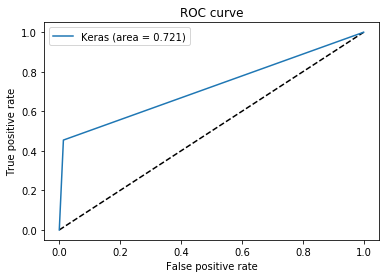

In [216]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()